In [2]:
# Author: Alison Silldorff
# File: analysis_work_exploration2.ipynb
# Date: 4/3/25
# Purpose: Use SQL database to analyze data for exploration 2-- PEOPLE
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import mysql.connector
from mysql.connector import Error
import json
from datetime import datetime
import csv
import unicodedata
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.ticker as ticker
import matplotlib.cm as cm

password = open("C:\\Users\\12676\\mysqlinfo", 'r').read()

In [3]:
connection = mysql.connector.connect(host='localhost', 
                                        database='shows_db',
                                        user='root',
                                        password=password, use_pure=True, buffered=True)

Let's first make standard versions of all the tables we need:

In [4]:
def take_year(date_elem):
    return date_elem.year

query1 = "SELECT * FROM person"
person_df = pd.read_sql_query(query1, con=connection)
person_df['birth_date'] = person_df['birth_date'].apply(pd.to_datetime, errors="coerce")
person_df['birth_year'] = person_df['birth_date'].apply(take_year)
person_df['death_date'] = person_df['death_date'].apply(pd.to_datetime, errors="coerce")
person_df['death_year'] = person_df['death_date'].apply(take_year)
person_df.fillna('')

query2 = "SELECT * FROM work_person"
wp_df = pd.read_sql_query(query2, con=connection)
wp_df.fillna('')

query3 = "SELECT * FROM work"
work_df = pd.read_sql_query(query3, con=connection)
work_df.fillna('')

query4 = "SELECT * FROM actor"
actor_df = pd.read_sql_query(query4, con=connection)
actor_df.fillna('')

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\985495613.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  person_df = pd.read_sql_query(query1, con=connection)
C:\Users\12676\AppData\Local\Temp\ipykernel_24704\985495613.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  wp_df = pd.read_sql_query(query2, con=connection)
C:\Users\12676\AppData\Local\Temp\ipykernel_24704\985495613.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  work_df = pd.read_sql_query(query3, con=connection)
C:\Users\12676\AppData\Local\Temp\i

,work_person_id,person_id,name,work_id,title,property_id,type_id,role,ibdb_url,tmdb_url,broadway_debut
0,00010011000000059800,0000000598,Eugene Edwards,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,"Byron, the Bank Guard",/broadway-cast-staff/eugene-edwards-86152,,0.0
1,00010011000000071200,0000000712,Gay Edmond,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,"Wanda, the Waitress",/broadway-cast-staff/gay-edmond-97693,,0.0
2,00010011000000071500,0000000715,John Grigas,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,Suspect 4,/broadway-cast-staff/john-grigas-80830,,0.0
3,00010011000000071900,0000000719,Mara Landi,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,"Barbie, the Receptionist",/broadway-cast-staff/mara-landi-85858,,0.0
4,00010011000000076000,0000000760,Bill Starr,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,Dong Ling,/broadway-cast-staff/bill-starr-84709,,0.0
...,...,...,...,...,...,...,...,...,...,...,...
114549,25820011000002681900,0000026819,Nette Solomon,25820011,Fine and Dandy,2582,11,Merriel Abbot Specialty Dancer,/broadway-cast-staff/nette-solomon-113097,,0.0
114550,25820011000002682000,0000026820,Odette Swan,25820011,Fine and Dandy,2582,11,Young Lady of the Fordyce Drop Forge and Tool ...,/broadway-cast-staff/odette-swan-113114,,0.0
114551,25820011000002682100,0000026821,Joe Wagstaff,25820011,Fine and Dandy,2582,11,George Ellis,/broadway-cast-staff/joe-wagstaff-63715,,0.0
114552,25820011000002682200,0000026822,Pat Walshe,25820011,Fine and Dandy,2582,11,J. Newton Wheer,/broadway-cast-staff/pat-walshe-63932,,0.0


Let's also add the year of each work to the dfs wp_df and actor_df

In [5]:
wp_df = pd.merge(wp_df, work_df, on='work_id', how='inner')[['work_person_id', 'person_id', 'work_id', 'name', 'property_id_x',
       'type_id_x', 'role', 'song', 'ibdb_url', 'tmdb_url', 'title', 'year']]
wp_df.columns = ['work_person_id', 'person_id', 'work_id', 'name', 'property_id',
       'type_id', 'role', 'song', 'ibdb_url', 'tmdb_url', 'title', 'year']

actor_df = pd.merge(actor_df, work_df, on='work_id', how='inner')[['work_person_id', 'person_id', 'name', 'work_id', 'title_x',
       'property_id_x', 'type_id_x', 'role', 'ibdb_url', 'tmdb_url', 'broadway_debut', 'year']]
actor_df.columns = ['work_person_id', 'person_id', 'name', 'work_id', 'title',
       'property_id', 'type_id', 'role', 'ibdb_url', 'tmdb_url', 'broadway_debut', 'year']

Some more merges are needed (NOTE: do not re-run this unless you have re-scraped wp_df and actor_df from SQL.):

In [6]:
wp_df = pd.merge(wp_df, person_df, on='person_id', how='inner')[['work_person_id', 'person_id', 'work_id', 'name_x', 'property_id',
       'type_id', 'role', 'song', 'ibdb_url_x', 'tmdb_url_x', 'title', 'year',
       'birth_date', 'death_date', 'birth_place', 'death_place',
       'gender', 'tmdb_popularity', 'birth_year', 'death_year']]
wp_df.columns = ['work_person_id', 'person_id', 'work_id', 'name', 'property_id',
       'type_id', 'role', 'song', 'ibdb_url', 'tmdb_url', 'title', 'year',
       'birth_date', 'death_date', 'birth_place', 'death_place',
       'gender', 'tmdb_popularity', 'birth_year', 'death_year']

actor_df = pd.merge(actor_df, person_df, on='person_id', how='inner')[['work_person_id', 'person_id', 'name_x', 'work_id', 'title',
       'property_id', 'type_id', 'role', 'ibdb_url_x', 'tmdb_url_x',
       'broadway_debut', 'year', 'birth_date', 'death_date',
       'birth_place', 'death_place', 'gender', 'tmdb_popularity', 'birth_year', 'death_year']]
actor_df.columns = ['work_person_id', 'person_id', 'name', 'work_id', 'title',
       'property_id', 'type_id', 'role', 'ibdb_url', 'tmdb_url',
       'broadway_debut', 'year', 'birth_date', 'death_date',
       'birth_place', 'death_place', 'gender', 'tmdb_popularity', 'birth_year', 'death_year']

Add the age of each person in these dfs:

In [7]:
wp_df['age']=wp_df['year']-wp_df['birth_year']
actor_df['age']=actor_df['year']-actor_df['birth_year']

rules: 
st_ prefix means it is just data from the stage
sc_ prefix means it is just data from the screen
_strict suffix means it uses our "strict" definition of a muscial


Let's make some useful sub-versions of these dataframes:

In [8]:
# work_person by stage and screen
st_wp_df = wp_df[wp_df['type_id'].isin(['11', '12', '13', '14'])]
sc_wp_df = wp_df[wp_df['type_id'].isin(['21', '22', '23', '24'])]

# actor by stage and screen
st_actor_df = actor_df[actor_df['type_id'].isin(['11', '12', '13', '14'])]
sc_actor_df = actor_df[actor_df['type_id'].isin(['21', '22', '23', '24'])]

# Crew df: all, stage, screen
crew_df = wp_df[wp_df['role']!='actor']
st_crew_df = crew_df[crew_df['type_id'].isin(['11', '12', '13', '14'])]
sc_crew_df = crew_df[crew_df['type_id'].isin(['21', '22', '23', '24'])]

# person_df: stage and screen
st_person_df = person_df[person_df['person_id'].isin(st_wp_df['person_id'])]
sc_person_df = person_df[person_df['person_id'].isin(sc_wp_df['person_id'])]

Let's get a list of work_ids that are in genres we don't want:

In [9]:
query1 = "SELECT * FROM ibdb_tag"
tags_df = pd.read_sql_query(query1, con=connection)

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\3839462032.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tags_df = pd.read_sql_query(query1, con=connection)


In [10]:
tags_to_remove = ['Opera', 'Operetta', 'Revue', 'Extravaganza', 'Vaudeville', 'Burlesque', 'Minstrel', 'Variety', 'Ballet'] # continue updating this
ids_to_remove = set()
properties_to_remove = set()
tags_df
# remove things by tag
for key, row in tags_df.iterrows():
    if row['work_id'] in ids_to_remove:
        continue
    if row['property_id'] in properties_to_remove:
        ids_to_remove.add(row['work_id'])
    if row['tag_name'] in tags_to_remove:
        ids_to_remove.add(row['work_id'])
        properties_to_remove.add(row['property_id'])

Make dfs that use this strict definition:

In [11]:
# work_person by stage and screen
wp_df_strict = wp_df[~wp_df['property_id'].isin(properties_to_remove)]
st_wp_df_strict = st_wp_df[~st_wp_df['property_id'].isin(properties_to_remove)]
sc_wp_df_strict = sc_wp_df[~sc_wp_df['property_id'].isin(properties_to_remove)]

# actor by stage and screen
actor_df_strict = actor_df[~actor_df['property_id'].isin(properties_to_remove)]
st_actor_df_strict = st_actor_df[~st_actor_df['property_id'].isin(properties_to_remove)]
sc_actor_df_strict = sc_actor_df[~sc_actor_df['property_id'].isin(properties_to_remove)]

# Crew df: all, stage, screen
crew_df_strict = crew_df[~crew_df['property_id'].isin(properties_to_remove)]
st_crew_df_strict = st_crew_df[~st_crew_df['property_id'].isin(properties_to_remove)]
sc_crew_df_strict = sc_crew_df[~sc_crew_df['property_id'].isin(properties_to_remove)]

# person_df: all, stage, screen
person_df_strict = person_df[person_df['person_id'].isin(wp_df_strict['person_id'])]
st_person_df_strict = st_person_df[st_person_df['person_id'].isin(st_wp_df_strict['person_id'])]
sc_person_df_strict = sc_person_df[sc_person_df['person_id'].isin(sc_wp_df_strict['person_id'])]

Make dfs that remove actor doubling and multiple credits for crew members:

In [12]:
actor_df_dist = actor_df[~actor_df.duplicated(subset=['work_id', 'person_id'], keep='first')]
st_actor_df_dist = st_actor_df[~st_actor_df.duplicated(subset=['work_id', 'person_id'], keep='first')]
sc_actor_df_dist = sc_actor_df[~sc_actor_df.duplicated(subset=['work_id', 'person_id'], keep='first')]

actor_df_strict_dist = actor_df_strict[~actor_df_strict.duplicated(subset=['work_id', 'person_id'], keep='first')]
st_actor_df_strict_dist = st_actor_df_strict[~st_actor_df_strict.duplicated(subset=['work_id', 'person_id'], keep='first')]
sc_actor_df_strict_dist = sc_actor_df_strict[~sc_actor_df_strict.duplicated(subset=['work_id', 'person_id'], keep='first')]

crew_df_dist = crew_df[~crew_df.duplicated(subset=['work_id', 'person_id'], keep='first')]
st_crew_df_dist = st_crew_df[~st_crew_df.duplicated(subset=['work_id', 'person_id'], keep='first')]
sc_crew_df_dist = sc_crew_df[~sc_crew_df.duplicated(subset=['work_id', 'person_id'], keep='first')]

crew_df_strict_dist = crew_df_strict[~crew_df_strict.duplicated(subset=['work_id', 'person_id'], keep='first')]
st_crew_df_strict_dist = st_crew_df_strict[~st_crew_df_strict.duplicated(subset=['work_id', 'person_id'], keep='first')]
sc_crew_df_strict_dist = sc_crew_df_strict[~sc_crew_df_strict.duplicated(subset=['work_id', 'person_id'], keep='first')]

Let's get a sense of what's in our data, what's missing, etc.

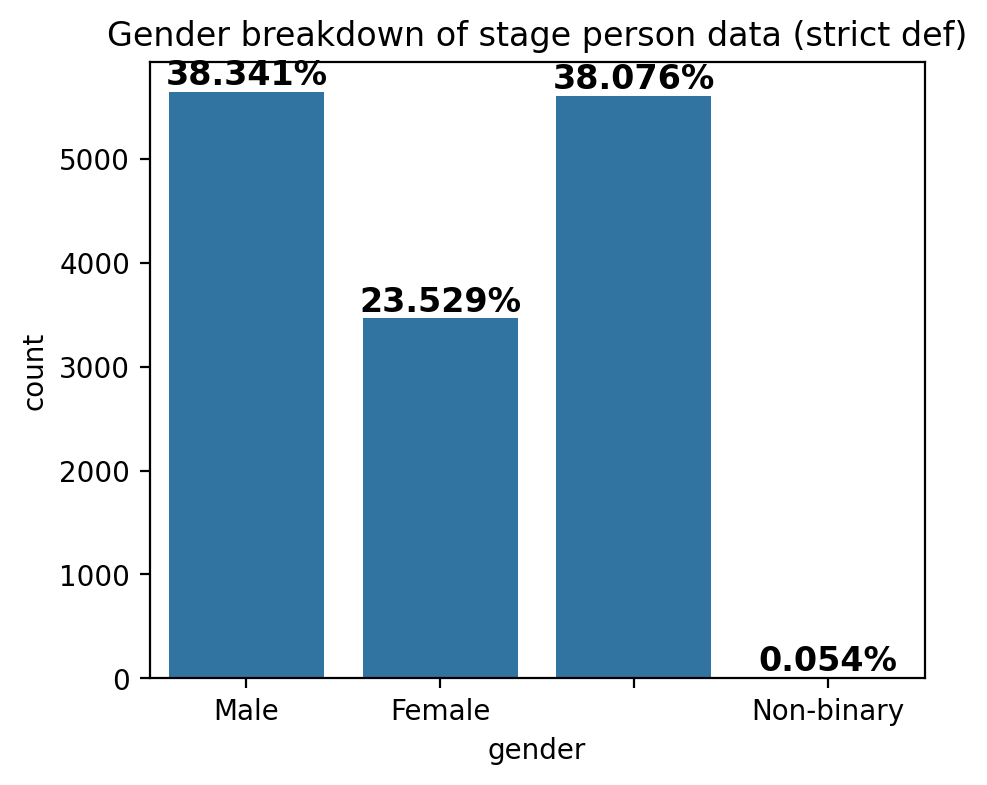

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=sc_actor_df, x="gender", ax=ax)

# add percentages of the total onto the top of the countplot.
total = len(sc_actor_df)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.3f}%"  # Convert to percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")
plt.title('Gender breakdown of stage person data (strict def)')
plt.show()

In [14]:
st_actor_df_distinct = st_actor_df[~st_actor_df.duplicated(subset=['work_id', 'person_id'], keep='first')]
st_actor_df_distinct

,work_person_id,person_id,name,work_id,title,property_id,type_id,role,ibdb_url,tmdb_url,...,year,birth_date,death_date,birth_place,death_place,gender,tmdb_popularity,birth_year,death_year,age
0,00010011000000059800,0000000598,Eugene Edwards,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,"Byron, the Bank Guard",/broadway-cast-staff/eugene-edwards-86152,None,...,1966,NaT,NaT,,,Male,NaN,NaN,NaN,NaN
1,00010011000000071200,0000000712,Gay Edmond,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,"Wanda, the Waitress",/broadway-cast-staff/gay-edmond-97693,None,...,1966,NaT,NaT,,,Female,NaN,NaN,NaN,NaN
2,00010011000000071500,0000000715,John Grigas,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,Suspect 4,/broadway-cast-staff/john-grigas-80830,None,...,1966,1930-02-16,NaT,"Shenandoah, Pennsylvania, USA",,Male,NaN,1930.0,NaN,36.0
3,00010011000000071900,0000000719,Mara Landi,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,"Barbie, the Receptionist",/broadway-cast-staff/mara-landi-85858,None,...,1966,NaT,NaT,,,Female,NaN,NaN,NaN,NaN
4,00010011000000076000,0000000760,Bill Starr,00010011,"""It's a Bird...It's a Plane...It's Superman""",0001,11,Dong Ling,/broadway-cast-staff/bill-starr-84709,None,...,1966,NaT,NaT,,,Male,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114527,25820011000002681800,0000026818,Claribel Skinner,25820011,Fine and Dandy,2582,11,Young Lady of the Fordyce Drop Forge and Tool ...,/broadway-cast-staff/claribel-skinner-113106,None,...,1930,NaT,NaT,,,Female,NaN,NaN,NaN,NaN
114528,25820011000002681900,0000026819,Nette Solomon,25820011,Fine and Dandy,2582,11,Merriel Abbot Specialty Dancer,/broadway-cast-staff/nette-solomon-113097,None,...,1930,NaT,NaT,,,Female,NaN,NaN,NaN,NaN
114529,25820011000002682000,0000026820,Odette Swan,25820011,Fine and Dandy,2582,11,Young Lady of the Fordyce Drop Forge and Tool ...,/broadway-cast-staff/odette-swan-113114,None,...,1930,NaT,NaT,,,Female,NaN,NaN,NaN,NaN
114530,25820011000002682100,0000026821,Joe Wagstaff,25820011,Fine and Dandy,2582,11,George Ellis,/broadway-cast-staff/joe-wagstaff-63715,None,...,1930,NaT,NaT,,,Male,NaN,NaN,NaN,NaN


Let's look at age data of stage actors

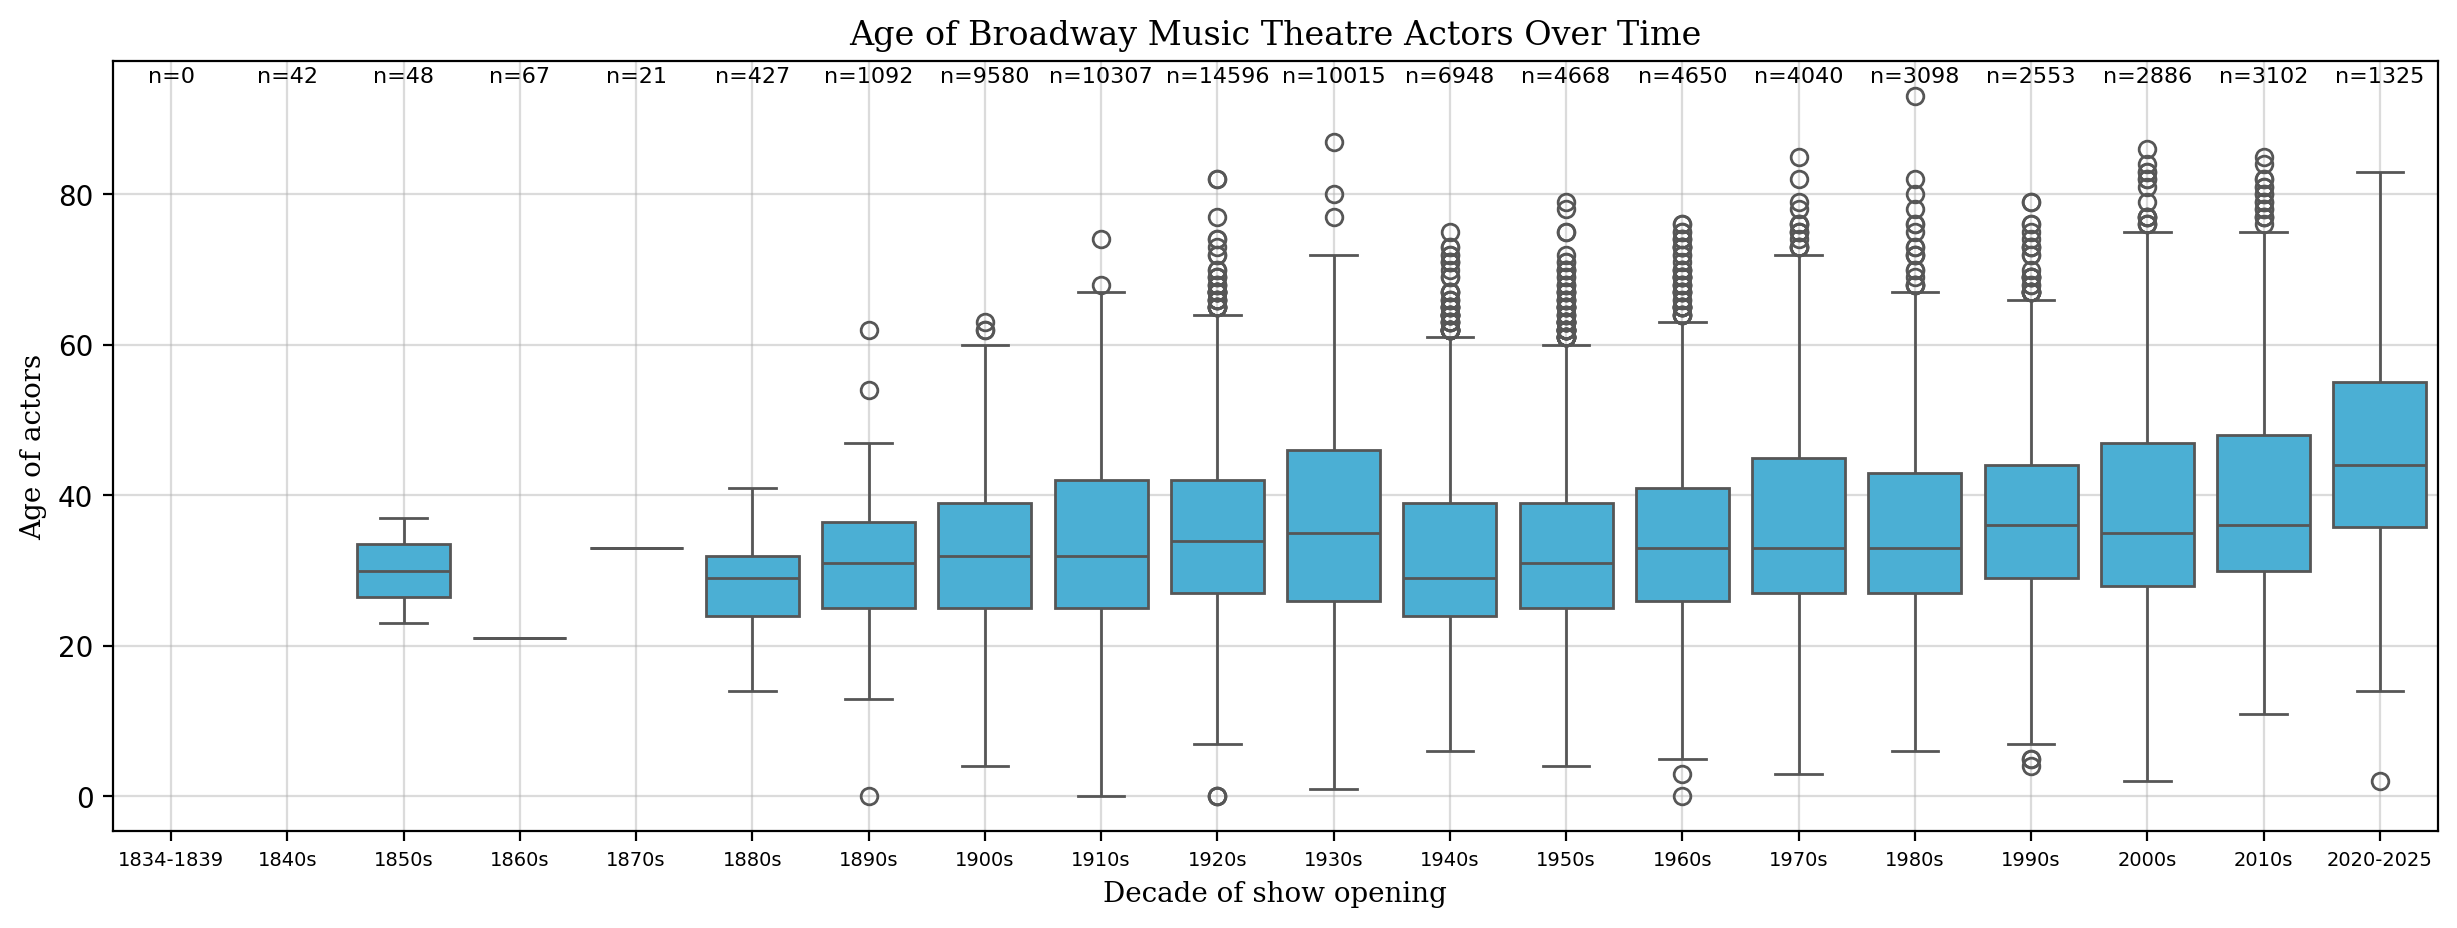

33.0


In [15]:
# USE THIS FOR BOXPLOT WITHOUT GENDER

bins4 = [1834, 1839, 1849, 1859, 1869, 1879, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels4 = ['1834-1839', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']

# I'm changing this to be distinct and dropping the suffix out of LAZINESS
binned_st_actor_df = st_actor_df_dist.copy()

binned_st_actor_df['year_bin'] = pd.cut(binned_st_actor_df['year'], bins=bins4, labels=bin_labels4, include_lowest=True)
binned_st_actor_df['year_bin']=binned_st_actor_df['year_bin'].astype(str) 
binned_st_actor_df_filt = binned_st_actor_df[binned_st_actor_df['gender']!='']

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='year_bin', y='age', data=binned_st_actor_df, order=bin_labels4, ax=ax,color="#34baeb")
plt.xlabel('Decade of show opening', fontfamily="serif")
plt.xticks(fontsize=7)
plt.ylabel('Age of actors', fontfamily="serif")
plt.grid(alpha=0.45)
#plt.figtext(0.5, -0.05, "test caption", ha='center', fontsize=10, fontfamily="serif") #this is for a caption
plt.title("Age of Broadway Music Theatre Actors Over Time", fontfamily="serif")

# this code is written by ChatGPT and puts the value counts of each bin above the box.
counts31 = binned_st_actor_df['year_bin'].value_counts()
for i, category in enumerate(bin_labels4):
    count = counts31[category] if category in counts31 else 0  # Get count or default to 0
    ax.annotate(f'n={count}', xy=(i, binned_st_actor_df['age'].max()), xytext=(0,5), 
                textcoords="offset points", ha='center', fontsize=8, color="black")
plt.show()

#plt.scatter(wp_df['year'], wp_df['age'])

print(binned_st_actor_df['age'].median())

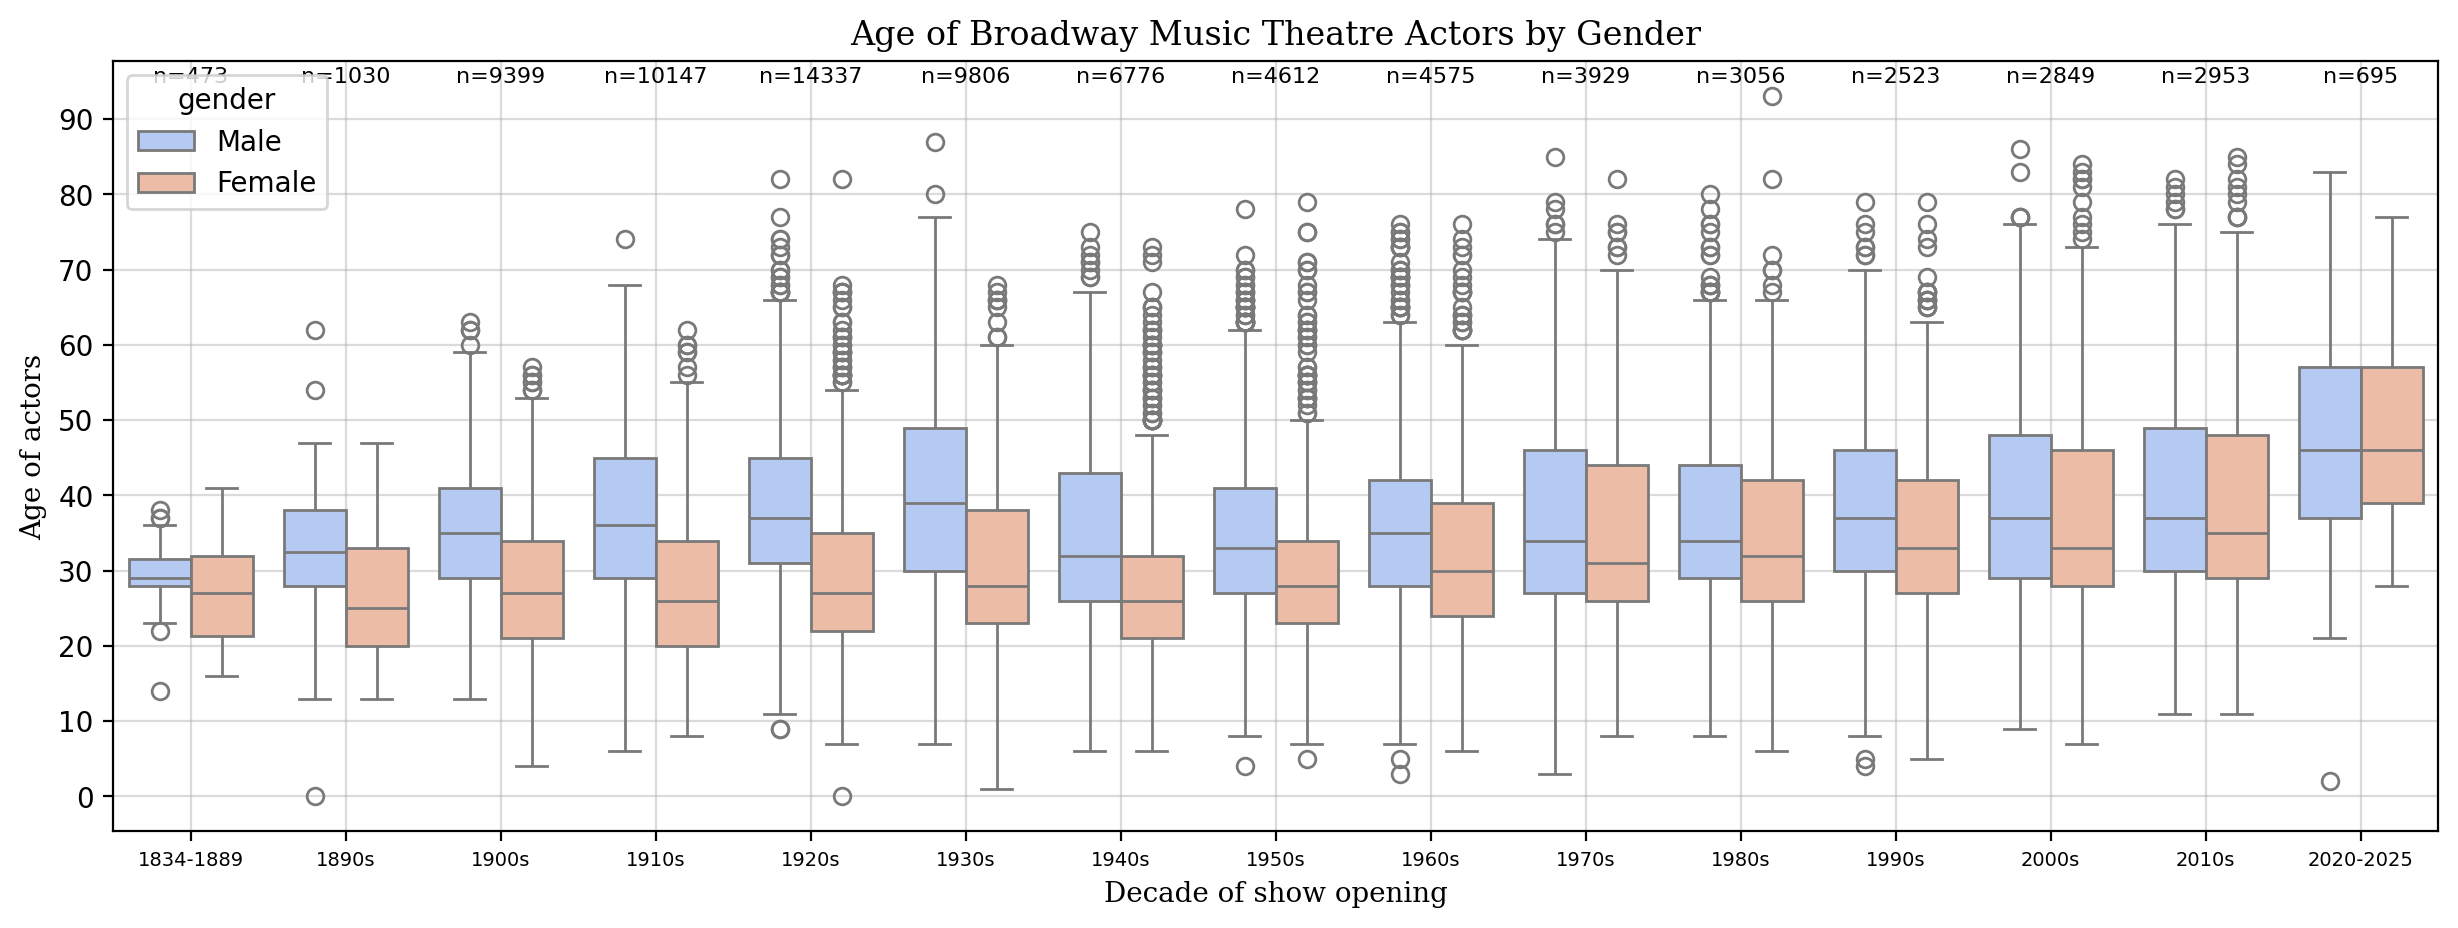

Median total_bill by day:
year_bin   gender
1834-1889  Female    27.0
           Male      29.0
1890s      Female    25.0
           Male      32.5
1900s      Female    27.0
           Male      35.0
1910s      Female    26.0
           Male      36.0
1920s      Female    27.0
           Male      37.0
1930s      Female    28.0
           Male      39.0
1940s      Female    26.0
           Male      32.0
1950s      Female    28.0
           Male      33.0
1960s      Female    30.0
           Male      35.0
1970s      Female    31.0
           Male      34.0
1980s      Female    32.0
           Male      34.0
1990s      Female    33.0
           Male      37.0
2000s      Female    33.0
           Male      37.0
2010s      Female    35.0
           Male      37.0
2020-2025  Female    46.0
           Male      46.0
Name: age, dtype: float64


In [ ]:
# USE THIS FOR BOXPLOT BY GENDER

bins4 = [1834, 1839, 1849, 1859, 1869, 1879, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels4 = ['1834-1839', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']

# group the stuff with little data into one bin.
bins3 = [1834, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels3 = ['1834-1889', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']


# dropping the suffix.
binned_st_actor_df = st_actor_df_dist.copy()

binned_st_actor_df['year_bin'] = pd.cut(binned_st_actor_df['year'], bins=bins3, labels=bin_labels3, include_lowest=True)
binned_st_actor_df['year_bin']=binned_st_actor_df['year_bin'].astype(str) 
binned_st_actor_df_filt = binned_st_actor_df[binned_st_actor_df['gender']!='']

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_yticks(range(0, 100, 10))
sns.boxplot(x='year_bin', y='age', data=binned_st_actor_df_filt, order=bin_labels3, hue='gender', ax=ax,palette='coolwarm')
plt.xlabel('Decade of show opening', fontfamily="serif")
plt.xticks(fontsize=7)
plt.ylabel('Age of actors', fontfamily="serif")
plt.grid(alpha=0.45)
#plt.figtext(0.5, -0.05, "test caption", ha='center', fontsize=10, fontfamily="serif") #this is for a caption
plt.title("Age of Broadway Music Theatre Actors by Gender", fontfamily="serif")

# this code is written by ChatGPT and puts the value counts of each bin above the box.
counts31 = binned_st_actor_df_filt['year_bin'].value_counts()
for i, category in enumerate(bin_labels3):
    count = counts31[category] if category in counts31 else 0  # Get count or default to 0
    ax.annotate(f'n={count}', xy=(i, binned_st_actor_df_filt['age'].max()), xytext=(0,5), 
                textcoords="offset points", ha='center', fontsize=8, color="black")
plt.show()

medians = binned_st_actor_df_filt.groupby(['year_bin', 'gender'])['age'].median()
print("Median total_bill by day:")
print(medians)
#plt.scatter(wp_df['year'], wp_df['age'])

In [17]:
st_actor_df[st_actor_df['age']<10]

,work_person_id,person_id,name,work_id,title,property_id,type_id,role,ibdb_url,tmdb_url,...,year,birth_date,death_date,birth_place,death_place,gender,tmdb_popularity,birth_year,death_year,age
2100,00480011000004531500,0000045315,Shawn Campbell,00480011,A Joyful Noise,0048,11,John Tom,/broadway-cast-staff/shawn-campbell-93503,None,...,1966,1958-07-10,1993-06-28,"New York, New York, USA","Las Vegas, Nevada, USA",Male,NaN,1958.0,1993.0,8.0
3951,01050011000003697300,0000036973,Fridkin and Rhoda,01050011,Adrienne,0105,11,Specialty Dancers,/broadway-cast-staff/fridkin-and-rhoda-461058,None,...,1923,1923-01-01,NaT,,,,NaN,1923.0,NaN,0.0
4621,01190011000002825200,0000028252,Rex Thompson,01190011,Alive and Kicking,0119,11,Boy,/broadway-cast-staff/rex-thompson-62228,None,...,1950,1942-12-14,NaT,"New York, New York, USA",,Male,0.1315,1942.0,NaN,8.0
4622,01190011000002825201,0000028252,Rex Thompson,01190011,Alive and Kicking,0119,11,"""Building Going Up"" Singer",/broadway-cast-staff/rex-thompson-62228,None,...,1950,1942-12-14,NaT,"New York, New York, USA",,Male,0.1315,1942.0,NaN,8.0
5523,01360011000000539300,0000005393,Judyth Burroughs,01360011,Along Fifth Avenue,0136,11,"""Fifth Avenue"" Ensemble",/broadway-cast-staff/judyth-burroughs-112423,None,...,1949,1940-06-06,NaT,"Miami, Florida, USA",,Female,NaN,1940.0,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112818,25360011000002324700,0000023247,Matthew McGrath,25360011,Working,2536,11,John Rushton,/broadway-cast-staff/matthew-mcgrath-77912,None,...,1978,1969-06-11,NaT,"New York, New York, USA",,Male,NaN,1969.0,NaN,9.0
112994,25420011000002830200,0000028302,Barbara Elliott,25420011,You Never Know,2542,11,Showgirl,/broadway-cast-staff/barbara-elliott-83779,None,...,1938,1935-01-01,1998-04-18,,,Female,NaN,1935.0,1998.0,3.0
113428,25500011000002511600,0000025116,Jimmie McCallion,25500011,Yours Truly,2550,11,Jimmie,/broadway-cast-staff/jimmie-mccallion-421382,None,...,1927,1918-09-27,1991-07-11,,,Male,NaN,1918.0,1991.0,9.0
113498,25530011000000616000,0000006160,Gertrude Vanderbilt,25530011,Ziegfeld Follies of 1908,2553,11,Abel,/broadway-cast-staff/gertrude-vanderbilt-63083,None,...,1908,1900-01-01,1960-02-18,,"New York, New York, USA",Female,NaN,1900.0,1960.0,8.0


Let's look at specifically first musical (more accurately, the first show where they were in the OBC):

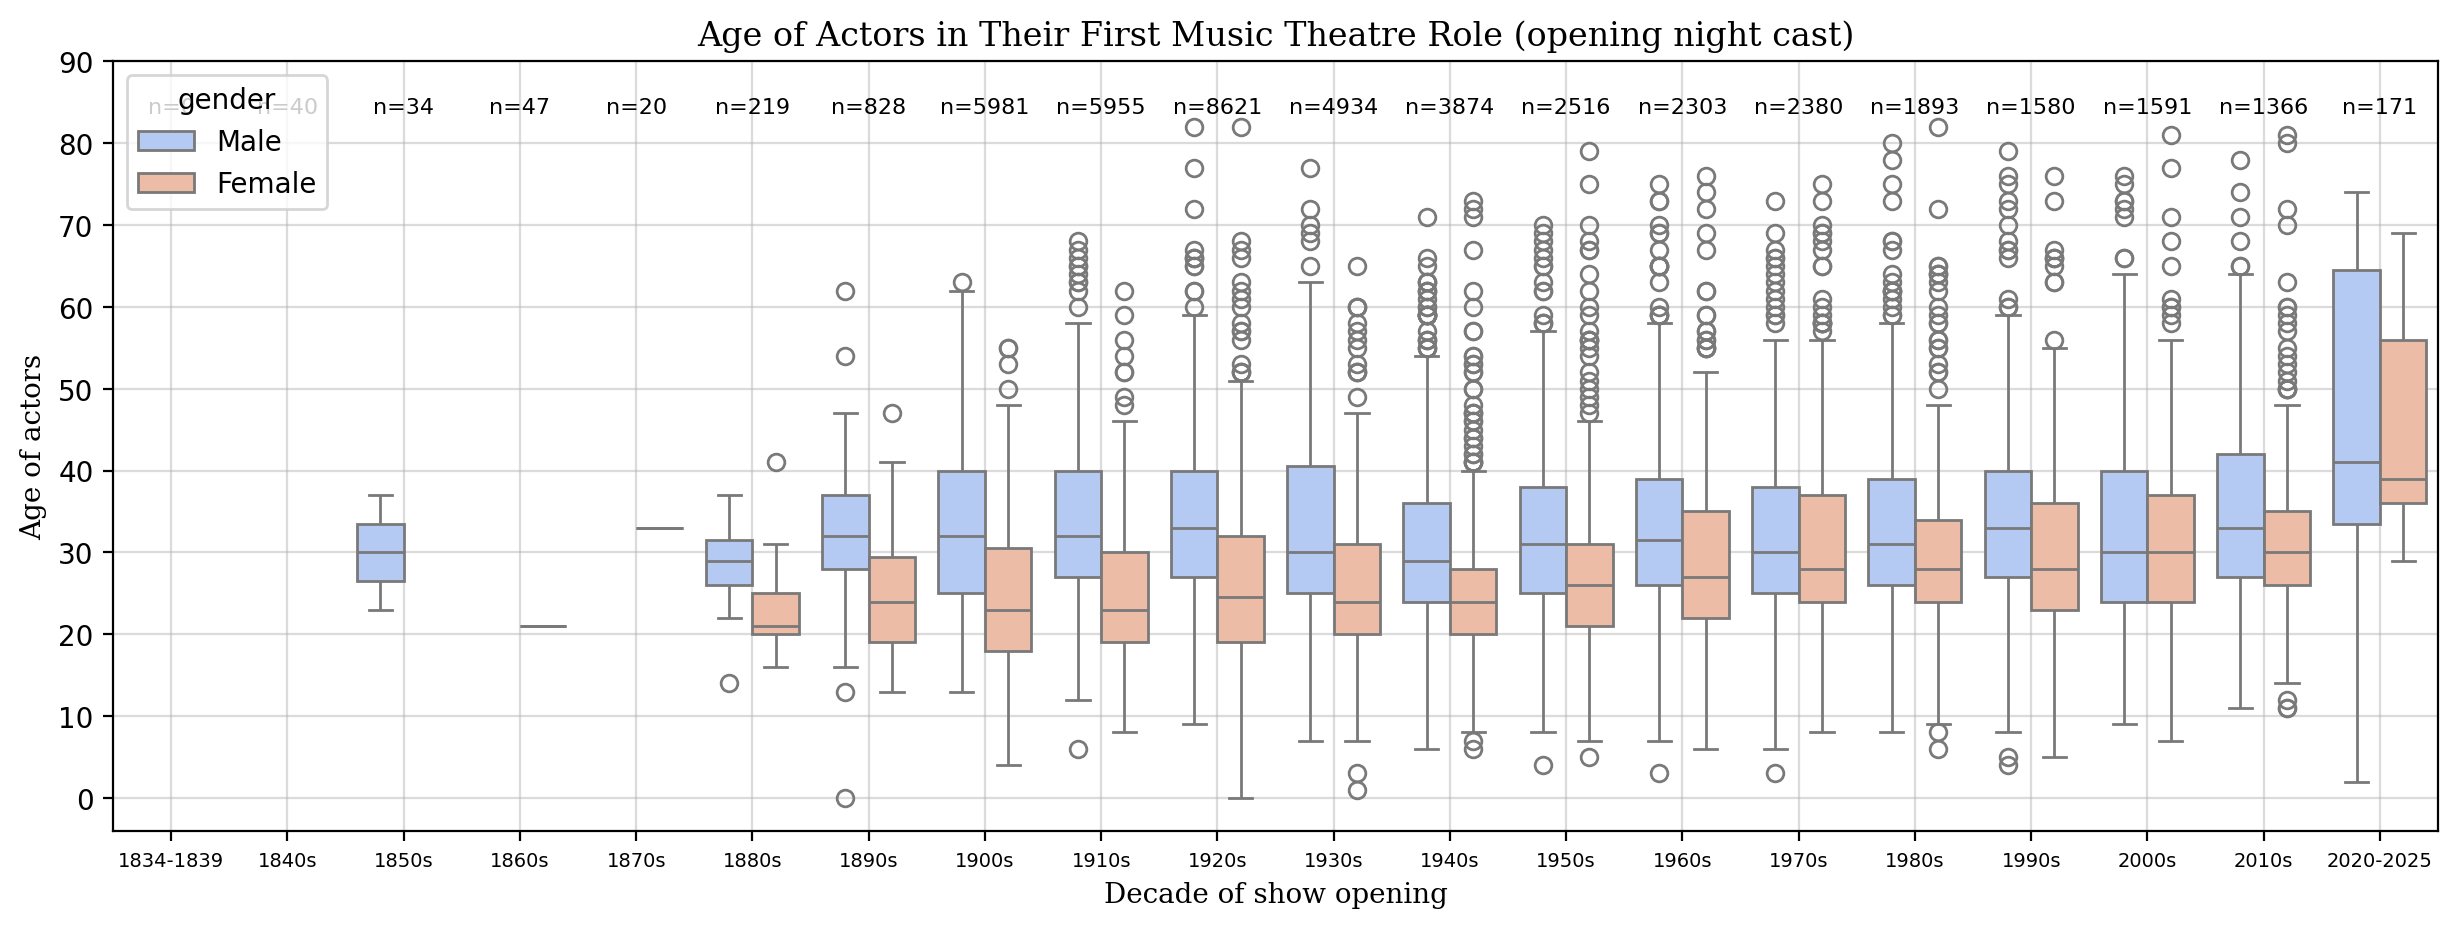

In [18]:
bins4 = [1834, 1839, 1849, 1859, 1869, 1879, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels4 = ['1834-1839', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']

binned_st_actor_df = st_actor_df_dist.copy()

binned_st_actor_df['year_bin'] = pd.cut(binned_st_actor_df['year'], bins=bins4, labels=bin_labels4, include_lowest=True)
binned_st_actor_df['year_bin']=binned_st_actor_df['year_bin'].astype(str) 
binned_st_actor_df_filt = binned_st_actor_df[binned_st_actor_df['gender']!='']
binned_st_actor_df_filt_debut = binned_st_actor_df_filt.loc[binned_st_actor_df_filt.groupby('person_id')['year'].idxmin()]

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='year_bin', y='age', data=binned_st_actor_df_filt_debut, order=bin_labels4, ax=ax, hue='gender', hue_order=['Male', 'Female'], palette='coolwarm')
plt.xlabel('Decade of show opening', fontfamily="serif")
plt.xticks(fontsize=7)
plt.ylabel('Age of actors', fontfamily="serif")
ax.set_yticks(range(0, 100, 10))
plt.grid(alpha=0.45)
#plt.figtext(0.5, -0.05, "test caption", ha='center', fontsize=10, fontfamily="serif") #this is for a caption
plt.title("Age of Actors in Their First Music Theatre Role (opening night cast)", fontfamily="serif")

# this code is written by ChatGPT and puts the value counts of each bin above the box.
counts31 = binned_st_actor_df_filt_debut['year_bin'].value_counts()
for i, category in enumerate(bin_labels4):
    count = counts31[category] if category in counts31 else 0  # Get count or default to 0
    ax.annotate(f'n={count}', xy=(i, binned_st_actor_df_filt_debut['age'].max()), xytext=(0,5), 
                textcoords="offset points", ha='center', fontsize=8, color="black")
plt.show()

In [19]:
binned_st_actor_df_filt_debut.groupby(['year_bin', 'gender'])['age'].median()


year_bin   gender
1840s      Female     NaN
           Male       NaN
1850s      Female     NaN
           Male      30.0
1860s      Female    21.0
           Male       NaN
1870s      Female    33.0
           Male       NaN
1880s      Female    21.0
           Male      29.0
1890s      Female    24.0
           Male      32.0
1900s      Female    23.0
           Male      32.0
1910s      Female    23.0
           Male      32.0
1920s      Female    24.5
           Male      33.0
1930s      Female    24.0
           Male      30.0
1940s      Female    24.0
           Male      29.0
1950s      Female    26.0
           Male      31.0
1960s      Female    27.0
           Male      31.5
1970s      Female    28.0
           Male      30.0
1980s      Female    28.0
           Male      31.0
1990s      Female    28.0
           Male      33.0
2000s      Female    30.0
           Male      30.0
2010s      Female    30.0
           Male      33.0
2020-2025  Female    39.0
           Male     

I'm curious to look at "age of OBC musical debut" vs "number of Broadway OBC credits"

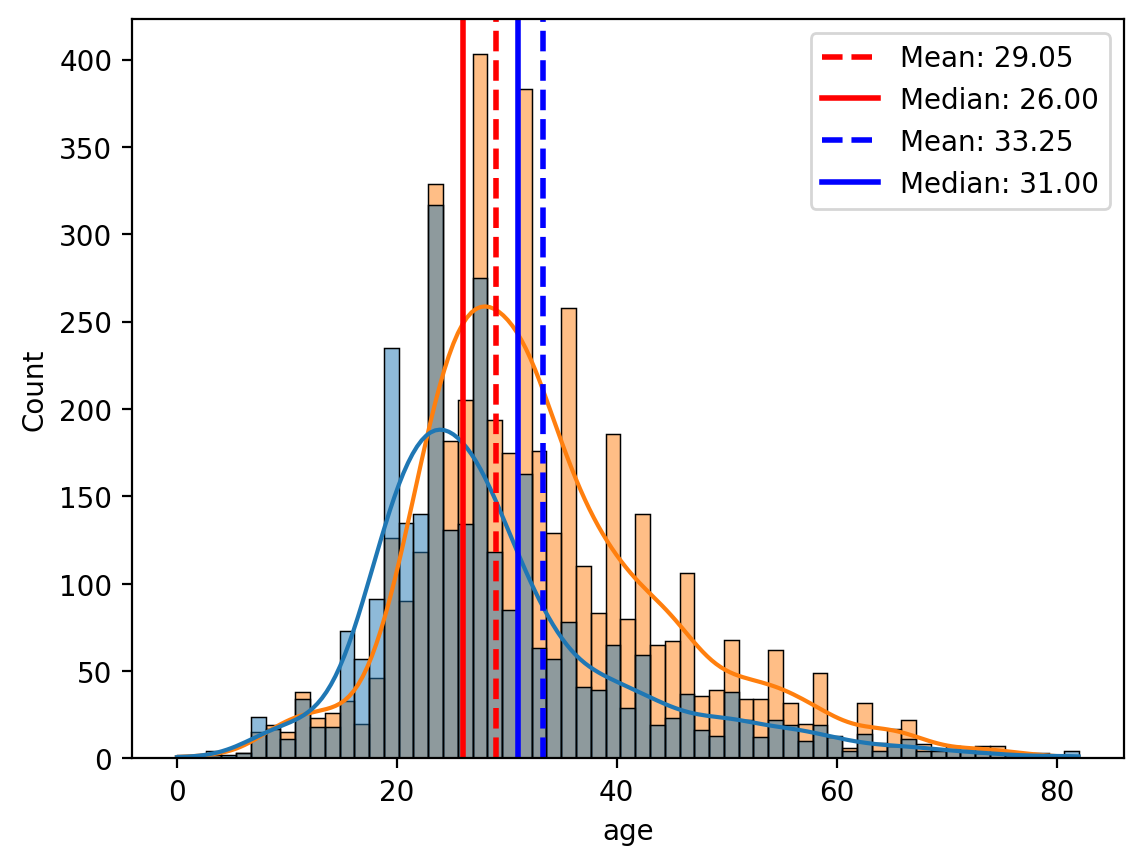

In [20]:
bins5 = [0, 18, 22, 27, 32, 37, 44, 54, 64, 74, 90] # the max is 82
bin_labels5 = ['under 18', '18-22', '23-27', '28-32', '33-37', '38-44', '45-54', '55-64', '65-74', '75+']
# first we want to bin by age.
binned_st_actor_df_1 = st_actor_df.copy()
binned_st_actor_df_1 = binned_st_actor_df_1.loc[binned_st_actor_df_1.groupby('person_id')['year'].idxmin()] # take only first OBC
binned_st_actor_df_1 = binned_st_actor_df_1[binned_st_actor_df_1['gender']!='']# take out empty genders

#plt.hist(binned_st_actor_df_1['age'], bins=30, edgecolor='black') # this gives us a binned bar version.
#sns.kdeplot(data=binned_st_actor_df_1, x='age', hue='gender', fill=True, palette='coolwarm', hue_order=['Male', 'Female']) # this gives us a smooth version
#sns.boxplot(data=binned_st_actor_df_1, hue='gender', x='age')
#sns.violinplot(data=binned_st_actor_df_1, x='age')
sns.histplot(data=binned_st_actor_df_1, x='age', hue='gender', kde=True)
#binned_st_actor_df_1

# Calculate mean & median
binned_st_actor_df_1[binned_st_actor_df_1['gender']!='']
f_mean_val = binned_st_actor_df_1[binned_st_actor_df_1['gender']=='Female']['age'].mean()
f_median_val = binned_st_actor_df_1[binned_st_actor_df_1['gender']=='Female']['age'].median()
m_mean_val = binned_st_actor_df_1[binned_st_actor_df_1['gender']=='Male']['age'].mean()
m_median_val = binned_st_actor_df_1[binned_st_actor_df_1['gender']=='Male']['age'].median()

# Add vertical lines for mean and median
plt.axvline(f_mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {f_mean_val:.2f}')
plt.axvline(f_median_val, color='red', linestyle='-', linewidth=2, label=f'Median: {f_median_val:.2f}')
plt.axvline(m_mean_val, color='blue', linestyle='--', linewidth=2, label=f'Mean: {m_mean_val:.2f}')
plt.axvline(m_median_val, color='blue', linestyle='-', linewidth=2, label=f'Median: {m_median_val:.2f}')
plt.legend()
plt.show()

In [21]:
binned_st_actor_df_filt_debut

,work_person_id,person_id,name,work_id,title,property_id,type_id,role,ibdb_url,tmdb_url,...,birth_date,death_date,birth_place,death_place,gender,tmdb_popularity,birth_year,death_year,age,year_bin
13495,03110011000000000000,0000000000,Karen Olivo,03110011,Brooklyn,0311,11,Faith,/broadway-cast-staff/karen-olivo-98858,None,...,1976-08-07,NaT,"New York, New York, USA",,Female,NaN,1976.0,NaN,28.0,2000s
58201,13130011000000000100,0000000001,Aaron Tveit,13130011,Next To Normal,1313,11,Gabe,/broadway-cast-staff/aaron-tveit-434605,None,...,1983-10-21,NaT,"Middletown, New York, USA",,Male,1.2525,1983.0,NaN,26.0,2000s
85026,18890011000000000200,0000000002,Danny Burstein,18890011,The Drowsy Chaperone,1889,11,Aldolpho,/broadway-cast-staff/danny-burstein-69936,None,...,1964-06-16,NaT,"New York, New York, USA",,Male,1.2634,1964.0,NaN,42.0,2000s
18268,03940011000000000300,0000000003,Robyn Hurder,03940011,Chitty Chitty Bang Bang,0394,11,Ensemble,/broadway-cast-staff/robyn-hurder-393748,None,...,1982-01-01,NaT,"Nashua, New Hampshire, USA",,Female,NaN,1982.0,NaN,23.0,2000s
21767,04830011000000000400,0000000004,Tam Mutu,04830011,Doctor Zhivago,0483,11,Yurii Zhivago,/broadway-cast-staff/tam-mutu-491296,None,...,1978-04-30,NaT,"Hastings, ENGLAND",,Male,NaN,1978.0,NaN,37.0,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61777,13780011000004631000,0000046310,Danny Litanny,13780011,Only Fools Are Sad,1378,11,Performer,/broadway-cast-staff/danny-litanny-104215,None,...,NaT,NaT,,,Male,NaN,NaN,NaN,NaN,1970s
61778,13780011000004631100,0000046311,Don Maseng,13780011,Only Fools Are Sad,1378,11,Performer,/broadway-cast-staff/don-maseng-104211,None,...,NaT,NaT,,,Male,NaN,NaN,NaN,NaN,1970s
61779,13780011000004631200,0000046312,Shlomo Nitzan,13780011,Only Fools Are Sad,1378,11,Performer,/broadway-cast-staff/shlomo-nitzan-104212,None,...,NaT,NaT,,,Male,NaN,NaN,NaN,NaN,1970s
61780,13780011000004631300,0000046313,Michal Noy,13780011,Only Fools Are Sad,1378,11,Performer,/broadway-cast-staff/michal-noy-104213,None,...,NaT,NaT,,,Male,NaN,NaN,NaN,NaN,1970s


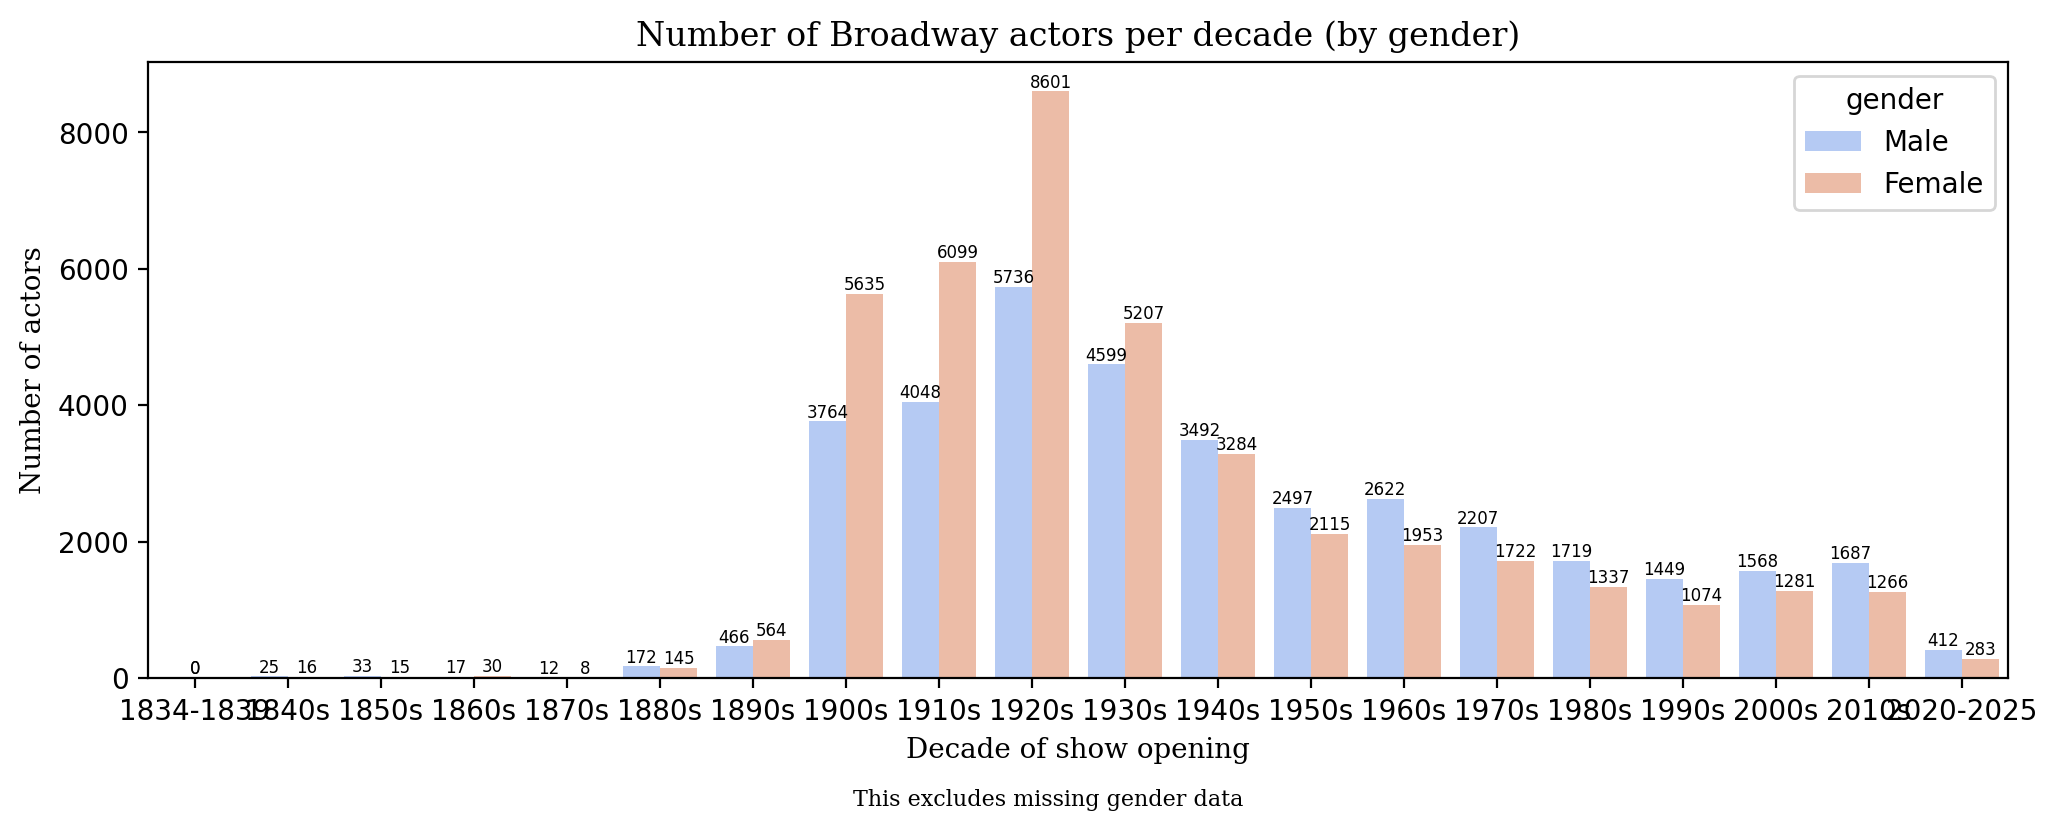

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data=binned_st_actor_df_filt, x="year_bin", hue='gender', palette="coolwarm", ax=ax, order=bin_labels4)


for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom', fontsize=6)

plt.title('Number of Broadway actors per decade (by gender)', fontfamily="serif")
plt.ylabel('Number of actors', fontfamily="serif")
plt.xlabel('Decade of show opening', fontfamily="serif")
plt.figtext(0.5, -0.05, "This excludes missing gender data", ha='center', fontsize=8, fontfamily="serif") #this is for a caption
plt.show()

In [23]:
st_actor_df.dtypes

work_person_id             object
person_id                  object
name                       object
work_id                    object
title                      object
property_id                object
type_id                    object
role                       object
ibdb_url                   object
tmdb_url                   object
broadway_debut            float64
year                        int64
birth_date         datetime64[ns]
death_date         datetime64[ns]
birth_place                object
death_place                object
gender                     object
tmdb_popularity           float64
birth_year                float64
death_year                float64
age                       float64
dtype: object

Let's run a few analyses of career lengths and quantities of actors. 

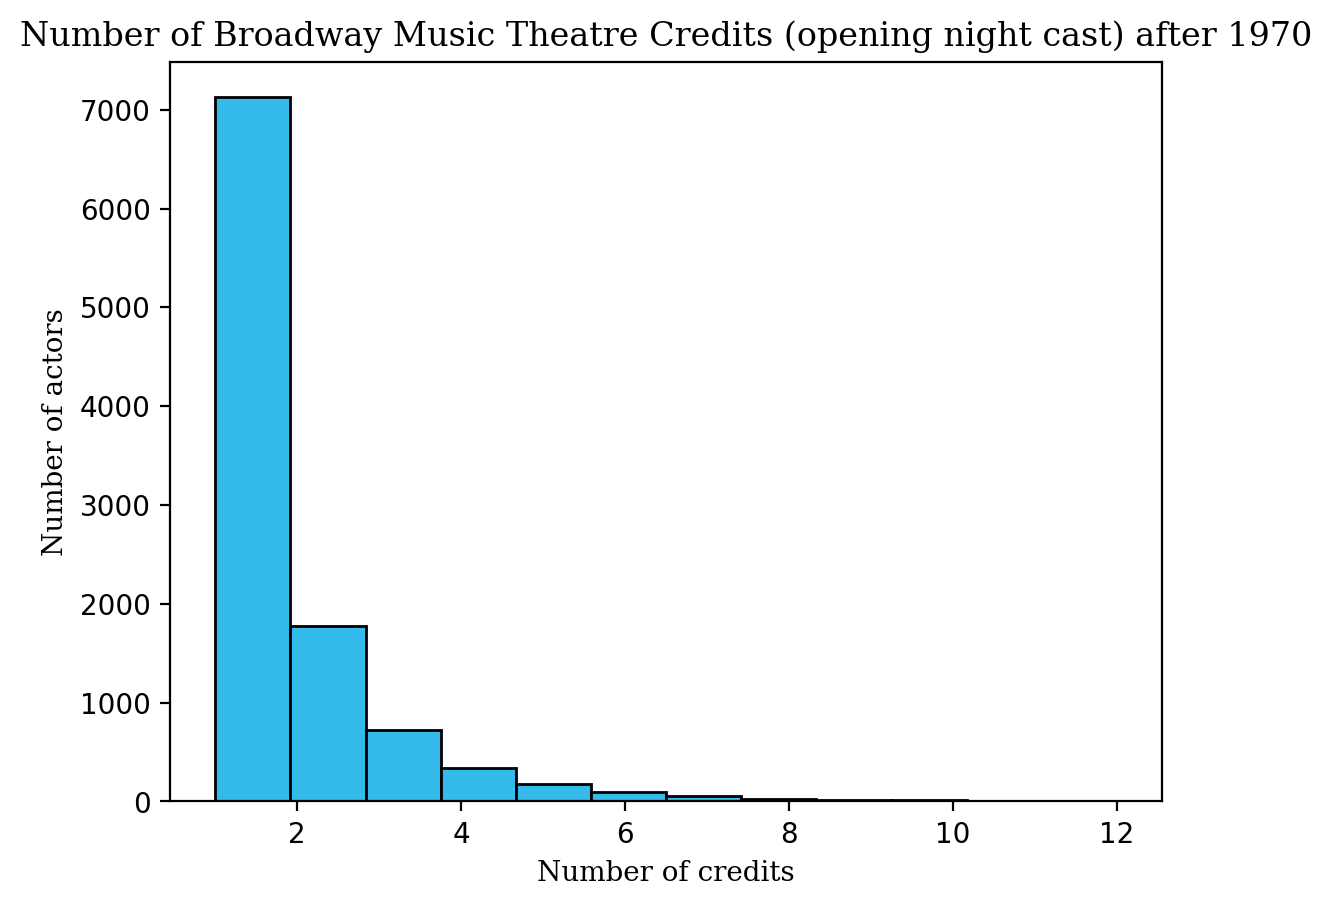

In [24]:
actor_counts_df = st_actor_df_dist[st_actor_df_dist['year']>1970]
actor_counts_df = actor_counts_df['person_id'].value_counts().reset_index()
#actor_counts_df
#sns.kdeplot(data=actor_counts_df, x='count', fill=True, palette='coolwarm', hue_order=['Male', 'Female', ''])
#sns.histplot(data=actor_counts_df, x='count')
plt.hist(actor_counts_df['count'], bins=12, edgecolor='black', color="#34baeb")
plt.title('Number of Broadway Music Theatre Credits (opening night cast) after 1970', fontfamily="serif")
plt.ylabel('Number of actors', fontfamily="serif")
plt.xlabel('Number of credits', fontfamily="serif")
actor_counts_df
most_creds_actor_df = st_actor_df_dist[st_actor_df_dist['person_id'].isin(actor_counts_df[actor_counts_df['count']>8]['person_id'])]
most_creds_actor_df
plt.show()
#actor_counts_df['count'].value_counts()

We've now made a sub-df of the 34 actors with the most OBC musical credits.

In [25]:
# df = pd.DataFrame({
#     'item': ['A', 'B', 'C', 'D'],
#     'start': [2, 4, 1, 3],
#     'end': [5, 7, 4, 6]
# })

# span_actors = most_creds_actor_df.copy()
# span_actors['start'] = most_creds_actor_df.loc[most_creds_actor_df.groupby('person_id')['year'].idxmin()] # take only first OBC
# most_creds_actor_df

# # Calculate width of each bar
# df['width'] = df['end'] - df['start']

# # the start value should be their first credit
# # width should be last credit minus first credit

# # Plot horizontal range bars
# plt.figure(figsize=(8, 4))
# plt.barh(df['item'], df['width'], left=df['start'], color='skyblue', edgecolor='black')

Text(0.5, 0, 'Year of Show Opening')

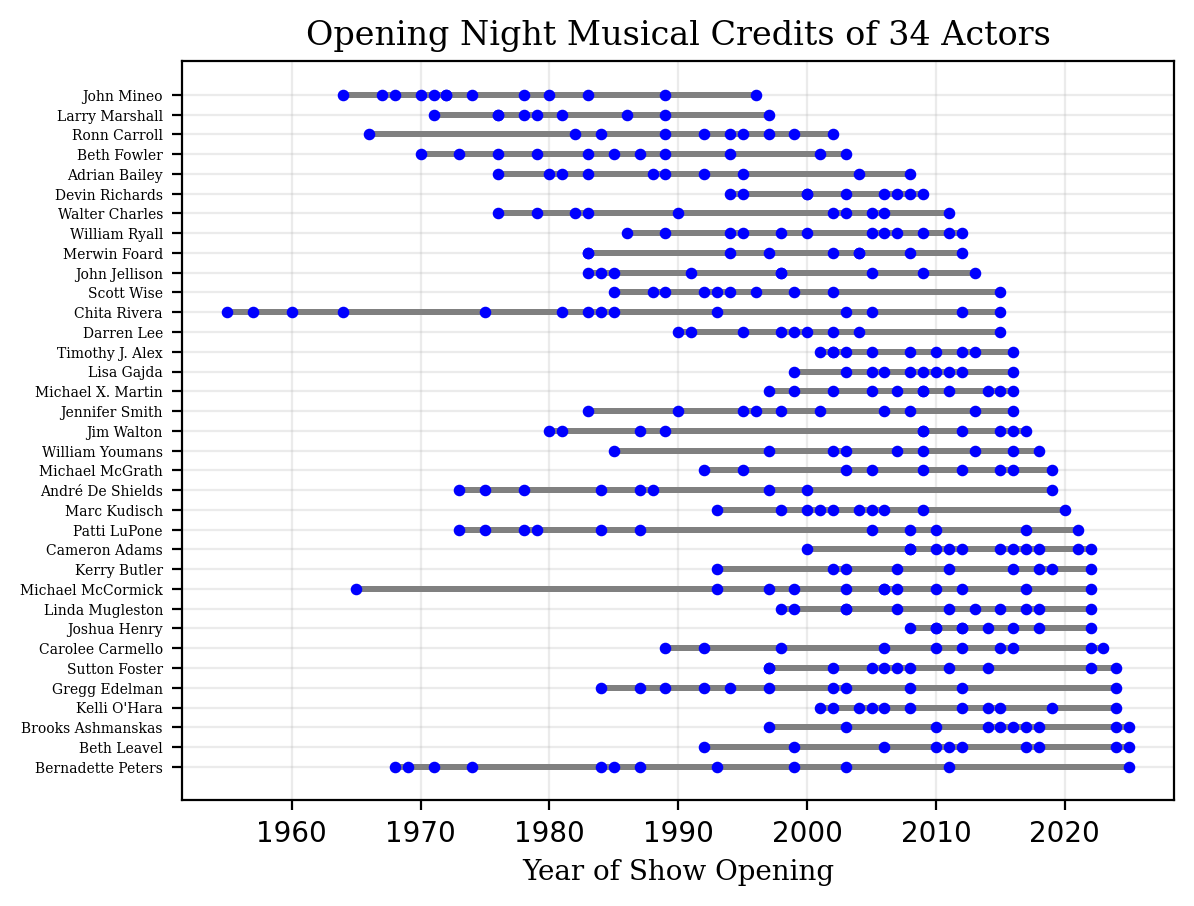

In [26]:
first_most_creds_actor_df = most_creds_actor_df.loc[most_creds_actor_df.groupby('person_id')['year'].idxmin()]
first_most_creds_actor_df = first_most_creds_actor_df.set_index('person_id')
last_most_creds_actor_df = most_creds_actor_df.loc[most_creds_actor_df.groupby('person_id')['year'].idxmax()]
last_most_creds_actor_df = last_most_creds_actor_df.set_index('person_id')

# first_most_creds_actor_df['year'] = pd.to_datetime(first_most_creds_actor_df['year'])
# last_most_creds_actor_df['year'] = pd.to_datetime(last_most_creds_actor_df['year'])

most_creds_actor_df = most_creds_actor_df.sort_values(by='year', ascending=False)
# print(most_creds_actor_df)

# fig, axes = plt.subplots(nrows=len(most_creds_actor_df['name'].unique()), ncols=1, figsize=(12, 14), sharex=True)
# names = most_creds_actor_df['name'].unique()

# for i, name in enumerate(names):
#     ax = axes[i]  # Select subplot axis
#     person_data = most_creds_actor_df[most_creds_actor_df['name'] == name]
#     print(person_data['year'])
    
#     # Plot the career start dates as scatter points
#     ax.scatter(person_data['year'], [name] * len(person_data), color='blue', s=10, label="Job Start", zorder=5)

#     # Plot lines from the minimum (start) to the maximum (end) for each person
#     for _, row in person_data.iterrows():
#         person_id = row['person_id']
#         ax.plot([first_most_creds_actor_df.loc[person_id]['year'], last_most_creds_actor_df.loc[person_id]['year']], [row['name'], row['name']], color='gray', lw=2, zorder=3)

#     # Annotate positions
#     for _, row in person_data.iterrows():
#         ax.annotate(row['position'], 
#                     (row['start'], name), 
#                     xytext=(10, 0), textcoords='offset points', 
#                     ha='left', fontsize=9)
    
#     # Set title for each subplot
#     ax.set_title(f"{name}'s Career Timeline")

colors = ['#333333', '#CCCCCC']
plt.scatter(most_creds_actor_df['year'], most_creds_actor_df['name'], color='blue', s=10, label="Job Start", zorder=5)
i = 0
for idx, row in most_creds_actor_df.iterrows():
     person_id = row['person_id']
     plt.plot([first_most_creds_actor_df.loc[person_id]['year'], last_most_creds_actor_df.loc[person_id]['year']], [row['name'], row['name']], color='grey', lw=2, zorder=3)

plt.title('Opening Night Musical Credits of 34 Actors', fontfamily="serif")
plt.yticks(fontsize=5, fontfamily='serif')
plt.grid(alpha=0.25)
plt.xlabel('Year of Show Opening', fontfamily="serif")


In [27]:
most_creds_actor_df['name'].value_counts()['Joshua Henry']

9

In [28]:
most_creds_actor_df['year'].median()

2003.0

This code block was for figuring out weird ages:

In [29]:
# for each stage acting credit, we want to plot the year they performed against their age when they performed.
#plt.scatter(wp_df['year'], wp_df['age'])
neg_year = pd.DataFrame(columns=wp_df.columns.tolist())
weird_neg_year = pd.DataFrame(columns=wp_df.columns.tolist())
high_year = pd.DataFrame(columns=wp_df.columns.tolist())
remove_birth_dates = set()
remove_death_dates = set()

good = 0
bad = 0
weird = 0
for key, row in wp_df.iterrows():
    if row['age']<0:
       bad +=1
       if row['birth_year']>row['death_year']:
        remove_birth_dates.add(row['person_id'])
        remove_death_dates.add(row['person_id'])
       else:
          remove_birth_dates.add(row['person_id'])
    if row['age']>0:
        good+=1
    if row['age']>100:
        if row['role']=='actor':
            high_year.loc[len(high_year)]=row
        weird+=1
print(good)
print(bad)
print(weird)
high_year

43588
0
302


,work_person_id,person_id,work_id,name,property_id,type_id,role,song,ibdb_url,tmdb_url,...,year,birth_date,death_date,birth_place,death_place,gender,tmdb_popularity,birth_year,death_year,age
0,00550123000006283100,0000062831,00550123,Robert Z. Leonard,0055,23,actor,None,None,themoviedb.org/person/93906,...,1990,1889-10-07 00:00:00,1968-08-27 00:00:00,"Chicago, Illinois, USA",None,Male,0.8773,1889.0,1968.0,101.0
1,01290022000005122300,0000051223,01290022,Frederick Stephani,0129,22,actor,None,None,themoviedb.org/person/33364,...,2016,1903-06-13 00:00:00,1962-10-31 00:00:00,"Bonn, Germany",None,Male,0.2314,1903.0,1962.0,113.0
2,04740423000005576300,0000055763,04740423,Karl Haffner,0474,23,actor,None,None,themoviedb.org/person/1888982,...,1986,1804-11-08 00:00:00,1876-02-29 00:00:00,,None,Male,0.0261,1804.0,1876.0,182.0
3,09950923000006952300,0000069523,09950923,Maurice Goldberg,0995,23,actor,None,None,themoviedb.org/person/2305316,...,2014,1881-12-13 00:00:00,1949-11-24 00:00:00,,None,Male,0.0214,1881.0,1949.0,133.0
4,10430324000006133000,0000061330,10430324,Marguerite James,1043,24,actor,None,None,themoviedb.org/person/1705506,...,2019,1918-07-21 00:00:00,1998-04-26 00:00:00,,None,Female,0.1175,1918.0,1998.0,101.0
5,10430324000006133001,0000061330,10430324,Marguerite James,1043,24,actor,None,None,themoviedb.org/person/1705506,...,2019,1918-07-21 00:00:00,1998-04-26 00:00:00,,None,Female,0.1175,1918.0,1998.0,101.0
6,11480723000006193500,0000061935,11480723,Jules Massenet,1148,23,actor,None,None,themoviedb.org/person/48053,...,1983,1842-05-12 00:00:00,1912-08-13 00:00:00,"Saint-Étienne, Loire, France",None,Male,0.1789,1842.0,1912.0,141.0
7,11480723000006193501,0000061935,11480723,Jules Massenet,1148,23,actor,None,None,themoviedb.org/person/48053,...,1983,1842-05-12 00:00:00,1912-08-13 00:00:00,"Saint-Étienne, Loire, France",None,Male,0.1789,1842.0,1912.0,141.0
8,11480723000006193502,0000061935,11480723,Jules Massenet,1148,23,actor,None,None,themoviedb.org/person/48053,...,1983,1842-05-12 00:00:00,1912-08-13 00:00:00,"Saint-Étienne, Loire, France",None,Male,0.1789,1842.0,1912.0,141.0
9,16930023000006611700,0000066117,16930023,Charles Brackett,1693,23,actor,None,None,themoviedb.org/person/8617,...,2022,1892-11-26 00:00:00,1969-03-09 00:00:00,"Saratoga Springs, New York, USA",None,Male,0.4,1892.0,1969.0,130.0


I want to look at the ages of heterosexual couples in musicals in original versus revival productions.

In [30]:
def get_actor_ages(show_list, df):
    for work_id in show_list[0]:
        i=0
        year = work_df.loc[work_df['work_id']==work_id, 'year'].values[0]
        title = work_df.loc[work_df['work_id']==work_id, 'title'].values[0]
        row = [work_id, show_list[1], title, year, 0, 0, 0, 0]
        for i in range(2, 6):
            try:
                age = st_actor_df.loc[(st_actor_df['work_id']==work_id) & (st_actor_df['role']==show_list[i]), 'age'].values[0]
            except:
                age = st_actor_df.loc[(st_actor_df['work_id']==work_id) & (st_actor_df['role']=='Ado Annie'), 'age'].values[0]
            row[i+2]= age
        df.loc[len(df)]=row
    return df

#st_actor_df.loc[(st_actor_df['property_id']=='2494') & (st_actor_df['role']=='Maria')].sort_values(by='year')
#st_actor_df.loc[(st_actor_df['property_id']=='1270') & (st_actor_df['role']=='Eliza Doolittle')].sort_values(by='year')
st_actor_df.loc[(st_actor_df['property_id']=='0650') & (st_actor_df['role']=='Gaston Lachaille')].sort_values(by='year') # also Gaston Lachailles -- account for this spelling difference
st_actor_df.loc[(st_actor_df['property_id']=='0694') & (st_actor_df['role']=='Miss Adelaide')].sort_values(by='year')
st_actor_df.loc[(st_actor_df['property_id']=='1354') & (st_actor_df['role']=='Ado Annie Carnes')].sort_values(by='year') # there seem to be 2 Laureys for the 1950s
st_actor_df.loc[(st_actor_df['property_id']=='0358') & (st_actor_df['role']=='Enoch Snow')].sort_values(by='year')
st_actor_df.loc[(st_actor_df['property_id']=='0975') & (st_actor_df['role']=='Bill Calhoun / Lucentio')].sort_values(by='year')

couples_df = pd.DataFrame(columns=['work_id', 'property_id', 'title', 'year', 'f1_age', 'm1_age', 'f2_age', 'm2_age'])
# # guys and dolls:
# ['Ado Annie Carnes', 'Ado Annie']
guys_and_dolls = [['06940012','06940112','06940212','06940311'], '0694', 'Miss Adelaide', 'Nathan Detroit', 'Sarah Brown', 'Sky Masterson']
west_side_story = [['24940012','24940111','24940212','24940312','24940412'], '2494', 'Maria', 'Tony', 'Anita', 'Bernardo']
carousel = [['03580012','03580112','03580211','03580312'], '0358', 'Julie Jordan', 'Billy Bigelow', 'Carrie Pipperidge', 'Enoch Snow']
oklahoma = [['13540012','13540112','13540212','13540312','13540411'], '1354', 'Laurey', 'Curly', 'Ado Annie Carnes', 'Will Parker']
kiss_me_kate = [['09750012', '09750112', '09750211', '09750312'], '0975', 'Lilli Vanessi / Katharine', 'Fred Graham / Petruchio', 'Lois Lane / Bianca', 'Bill Calhoun / Lucentio']
couples_df = get_actor_ages(guys_and_dolls, couples_df)
couples_df = get_actor_ages(west_side_story, couples_df)
couples_df = get_actor_ages(carousel, couples_df)
couples_df = get_actor_ages(kiss_me_kate, couples_df)
couples_df = get_actor_ages(oklahoma, couples_df)
couples_df.columns=['work_id', 'property_id', 'title', 'year', 'f1', 'm1', 'f2', 'm2']
couples_df=couples_df.melt(id_vars=['work_id', 'property_id', 'title', 'year'], var_name='role', value_name='age')
couples_df
# both_bin_counts_melted = both_bin_counts.melt(id_vars='opening_year_bin', var_name='rev/og', value_name='count')
# fig, ax = plt.subplots(figsize=(12, 4))
# sns.barplot(data=both_bin_counts_melted, x='opening_year_bin', y='count', hue='rev/og', palette='coolwarm', ax=ax, order=bin_labels4)


,work_id,property_id,title,year,role,age
0,06940012,0694,Guys and Dolls,1992,f1,35.0
1,06940112,0694,Guys and Dolls,1976,f1,48.0
2,06940212,0694,Guys and Dolls,2009,f1,42.0
3,06940311,0694,Guys and Dolls,1950,f1,29.0
4,24940012,2494,West Side Story,2020,f1,NaN
...,...,...,...,...,...,...
83,13540012,1354,Oklahoma!,1951,m2,NaN
84,13540112,1354,Oklahoma!,2019,m2,NaN
85,13540212,1354,Oklahoma!,2002,m2,25.0
86,13540312,1354,Oklahoma!,1979,m2,28.0


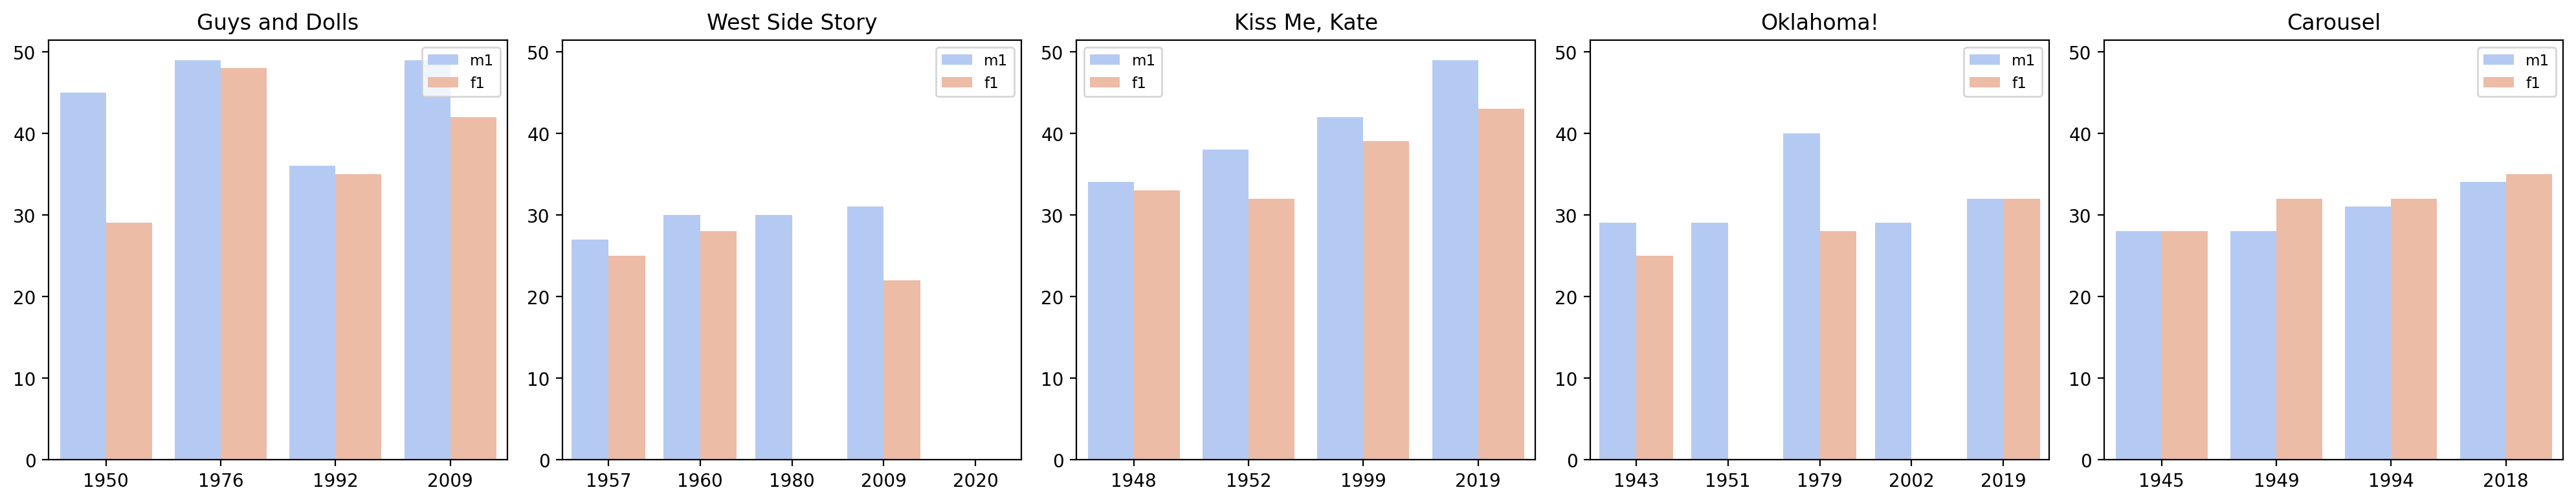

In [31]:
couples_df
# let's first try a bar chart that compares Carousel couple ages (julie and billy)

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
dfs = [couples_df.loc[couples_df['title']=='Guys and Dolls'], couples_df.loc[couples_df['title']=='West Side Story'], 
       couples_df.loc[couples_df['title']=='Kiss Me, Kate'], couples_df.loc[couples_df['title']=='Oklahoma!'],
       couples_df.loc[couples_df['title']=='Carousel']]

for i, df in enumerate(dfs):
    sns.barplot(data=df, x='year', y='age', hue='role', hue_order=['m1', 'f1'], ax=axes[i], palette='coolwarm')
    axes[i].set_title(df.iloc[0]['title'])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(labelleft=True)
    axes[i].legend(fontsize='small')

plt.tight_layout()
plt.show()

# carousel_df = couples_df.loc[couples_df['title']=='Guys and Dolls']
# sns.barplot(data=couples_df, x=carousel_df['year'], y=carousel_df['age'], hue='role', hue_order=['f1', 'm1'])

Moving onto crew analysis, starting with gender

<Axes: xlabel='year', ylabel='Count'>

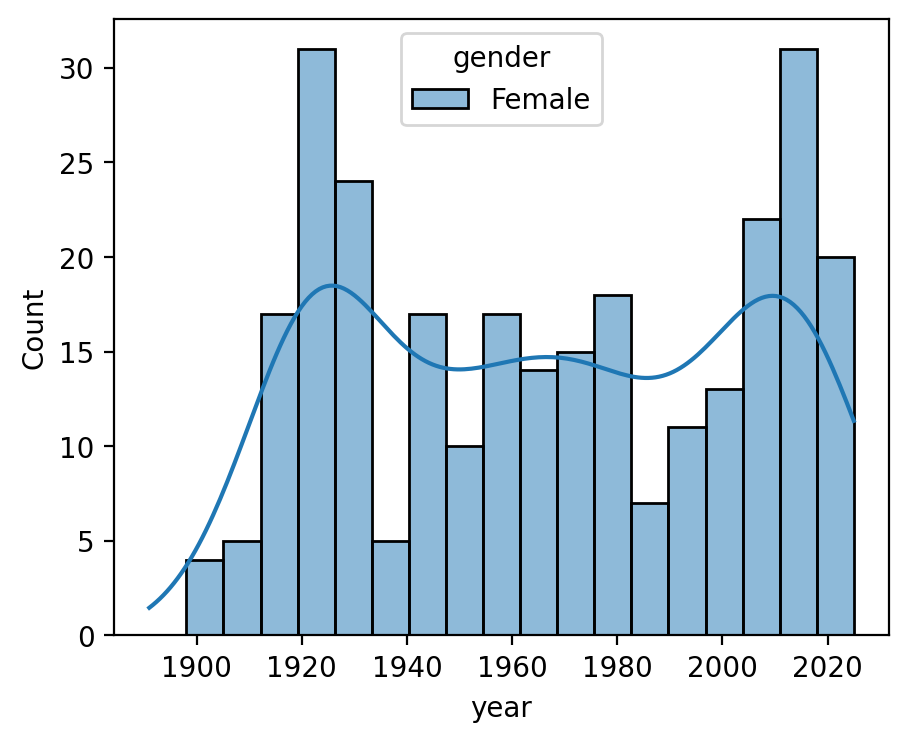

In [32]:
st_writer_df = st_crew_df_strict_dist.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]
st_crew_df_one = st_writer_df.drop_duplicates(subset='person_id', keep='first')
st_crew_df_one
fig, ax = plt.subplots(figsize=(5, 4))
#sns.countplot(data=st_crew_df_one, x='gender', ax=ax)
sns.histplot(data=st_writer_df, x='year', hue='gender', hue_order=['Female'], kde=True)
#sns.histplot(data=st_writer_df, x='year', kde=True)

In [33]:
st_crew_df_one['gender'].value_counts()

gender
Male      1514
Female     154
           129
Name: count, dtype: int64

Let's create a countplot binned by decade that shows the women and men with writing credits each year.

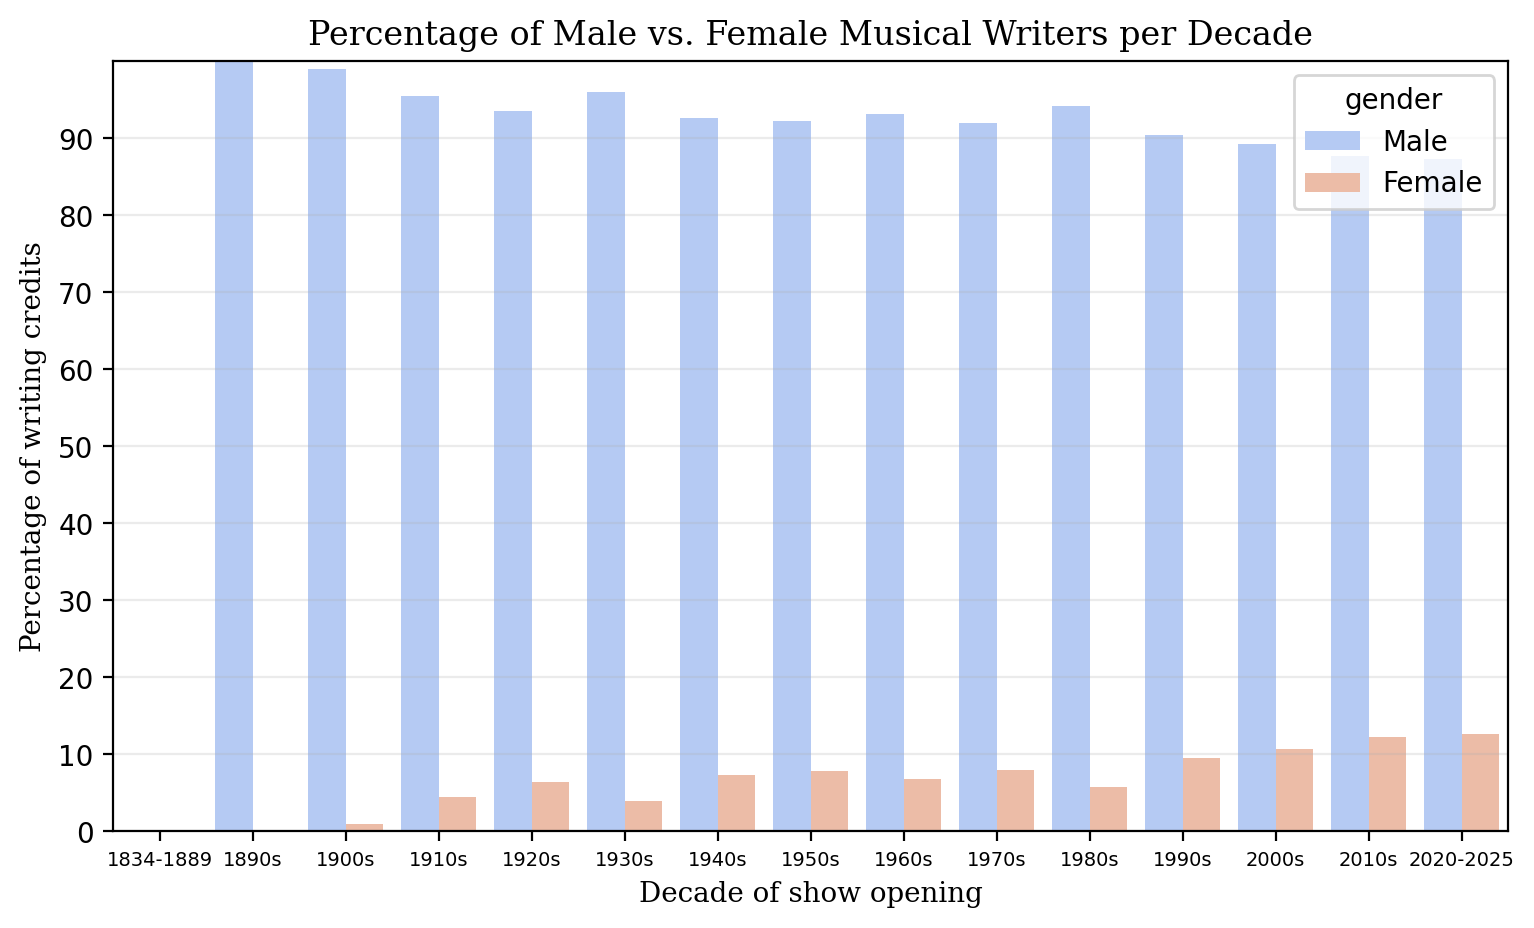

In [34]:
st_writer_df = st_crew_df_strict_dist.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]
# group the stuff with little data into one bin.
bins3 = [1834, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels3 = ['1834-1889', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']

binned_st_writer_df=st_writer_df.copy()
binned_st_writer_df['year_bin'] = pd.cut(st_writer_df['year'], bins=bins3, labels=bin_labels3, include_lowest=True)
binned_st_writer_df['year_bin']=binned_st_writer_df['year_bin'].astype(str) 
binned_st_writer_df = binned_st_writer_df[binned_st_writer_df['gender']!='']# take out empty genders

count_data = binned_st_writer_df.groupby(['gender', 'year_bin']).size().reset_index(name='count')

# Step 2: Calculate percentage within each 'category'
count_data['percent'] = count_data['count'] / count_data.groupby('year_bin')['count'].transform('sum') * 100

# Step 3: Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=count_data, x='year_bin', y='percent', hue='gender', order=bin_labels3, palette='coolwarm', hue_order=['Male', 'Female'])
plt.ylabel('Percentage of writing credits', fontfamily="serif")
plt.xlabel('Decade of show opening', fontfamily="serif")
plt.yticks(range(0, 100, 10))
plt.ylim(top=100)
plt.xticks(fontsize=7)
plt.title('Percentage of Male vs. Female Musical Writers per Decade', fontfamily="serif", fontsize=12)
plt.grid(axis='y', alpha=0.25)


# fig, ax = plt.subplots(figsize=(12, 4))
# sns.countplot(data=binned_st_writer_df, x="year_bin", hue='gender', palette="coolwarm", ax=ax, order=bin_labels4)


# for p in ax.patches:
#     count = int(p.get_height())
#     x = p.get_x() + p.get_width() / 2
#     y = p.get_height()
#     ax.annotate(f'{count}', (x, y), ha='center', va='bottom', fontsize=6)

# plt.title('Number of Broadway actors per decade (by gender)', fontfamily="serif")
# plt.ylabel('Number of actors', fontfamily="serif")
# plt.xlabel('Decade of show opening', fontfamily="serif")
# plt.figtext(0.5, -0.05, "This excludes missing gender data", ha='center', fontsize=8, fontfamily="serif") #this is for a caption
# plt.show()

In [35]:
count_data

,gender,year_bin,count,percent
0,Female,1900s,5,0.986193
1,Female,1910s,21,4.496788
2,Female,1920s,48,6.434316
3,Female,1930s,10,4.000000
4,Female,1940s,21,7.317073
5,Female,1950s,19,7.786885
6,Female,1960s,21,6.862745
7,Female,1970s,25,8.012821
8,Female,1980s,14,5.737705
9,Female,1990s,17,9.497207


In [36]:
binned_st_writer_df.loc[binned_st_writer_df['year_bin']=='2020-2025']

,work_person_id,person_id,work_id,name,property_id,type_id,role,song,ibdb_url,tmdb_url,...,birth_date,death_date,birth_place,death_place,gender,tmdb_popularity,birth_year,death_year,age,year_bin
137,00040011000004892500,0000048925,00040011,David West Read,0004,11,book,,/broadway-cast-staff/david-west-read-493215,None,...,NaT,NaT,,,Male,NaN,NaN,NaN,NaN,2020-2025
896,00100212000004634500,0000046345,00100212,Peter Stone,0010,12,book,,/broadway-cast-staff/peter-stone-8128,None,...,1930-02-27,2003-04-26,"Los Angeles, California, USA","New York, New York, USA",Male,0.3639,1930.0,2003.0,92.0,2020-2025
899,00100212000004747200,0000047472,00100212,Sherman Edwards,0010,12,music,,/broadway-cast-staff/sherman-edwards-10506,None,...,1919-04-04,1981-03-30,"New York, New York, USA","New York, New York, USA",Male,NaN,1919.0,1981.0,103.0,2020-2025
1273,00180011000004697300,0000046973,00180011,Neil Diamond,0018,11,music,,/broadway-cast-staff/neil-diamond-12689,None,...,1941-01-24,NaT,"Brooklyn, New York, USA",,Male,NaN,1941.0,NaN,81.0,2020-2025
6579,01340011000004682700,0000046827,01340011,Tom Kitt,0134,11,music,,/broadway-cast-staff/tom-kitt-100673,None,...,NaT,NaT,,,Male,NaN,NaN,NaN,NaN,2020-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131061,24820014000004729100,0000047291,24820014,Jessie Nelson,2482,14,book,,/broadway-cast-staff/jessie-nelson-502866,None,...,NaT,NaT,,,Female,NaN,NaN,NaN,NaN,2020-2025
131518,24920011000004662500,0000046625,24920011,Rick Elice,2492,11,book,,/broadway-cast-staff/rick-elice-394783,None,...,1956-11-17,NaT,"New York, New York, USA",,Male,NaN,1956.0,NaN,68.0,2020-2025
131584,24940012000000786100,0000007861,24940012,Leonard Bernstein,2494,12,music,,/broadway-cast-staff/leonard-bernstein-7257,None,...,1918-08-25,1990-10-14,"Lawrence, Massachusetts, USA","New York, New York, USA",Male,1.0622,1918.0,1990.0,102.0,2020-2025
131586,24940012000004639600,0000046396,24940012,Stephen Sondheim,2494,12,lyrics,,/broadway-cast-staff/stephen-sondheim-12430,None,...,1930-03-22,2021-11-26,"New York, New York, USA","Roxbury, Connecticut, USA",Male,0.3031,1930.0,2021.0,90.0,2020-2025


This looks at age:

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'under 20'),
  Text(1, 0, '20s'),
  Text(2, 0, '30s'),
  Text(3, 0, '40s'),
  Text(4, 0, '50s'),
  Text(5, 0, '60s'),
  Text(6, 0, '70s'),
  Text(7, 0, '80s'),
  Text(8, 0, '90s and up')])

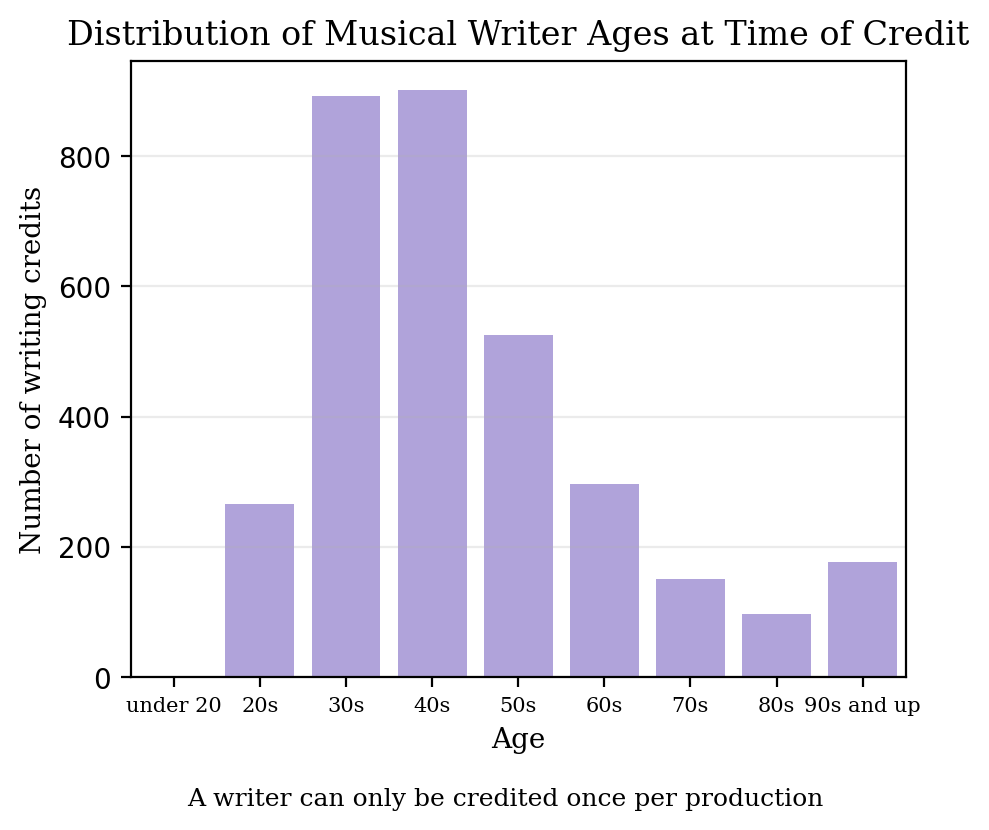

In [37]:
binned_st_writer_df = st_writer_df.copy()

bins6 = [0, 19, 29, 39, 49, 59, 69, 79, 89, 160]
bin_labels6 = ['under 20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s and up']
binned_st_writer_df['age_bin'] = pd.cut(st_writer_df['age'], bins=bins6, labels=bin_labels6, include_lowest=True)
binned_st_writer_df['age_bin']=binned_st_writer_df['age_bin'].astype(str) 
binned_st_writer_df = binned_st_writer_df.dropna(subset=['age'])# take out values with nan

order=binned_st_writer_df['age_bin'].value_counts().index

fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Distribution of Musical Writer Ages at Time of Credit', fontfamily='serif')
plt.grid(alpha=0.25)
plt.ylabel('Number of writing credits', fontfamily="serif")
plt.xlabel('Age', fontfamily="serif")
sns.countplot(data=binned_st_writer_df, x='age_bin', ax=ax, order=bin_labels6, color='#ab9ae3')
plt.figtext(0.5, -0.05, "A writer can only be credited once per production", ha='center', fontsize=9, fontfamily="serif")
plt.xticks(fontsize=7.5, fontfamily='serif')

How many writers have been credited posthumously?

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\3378516512.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=st_writer_df, x='name', ax=ax, order=order, palette=colors)
C:\Users\12676\AppData\Local\Temp\ipykernel_24704\3378516512.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(data=st_writer_df, x='name', ax=ax, order=order, palette=colors)


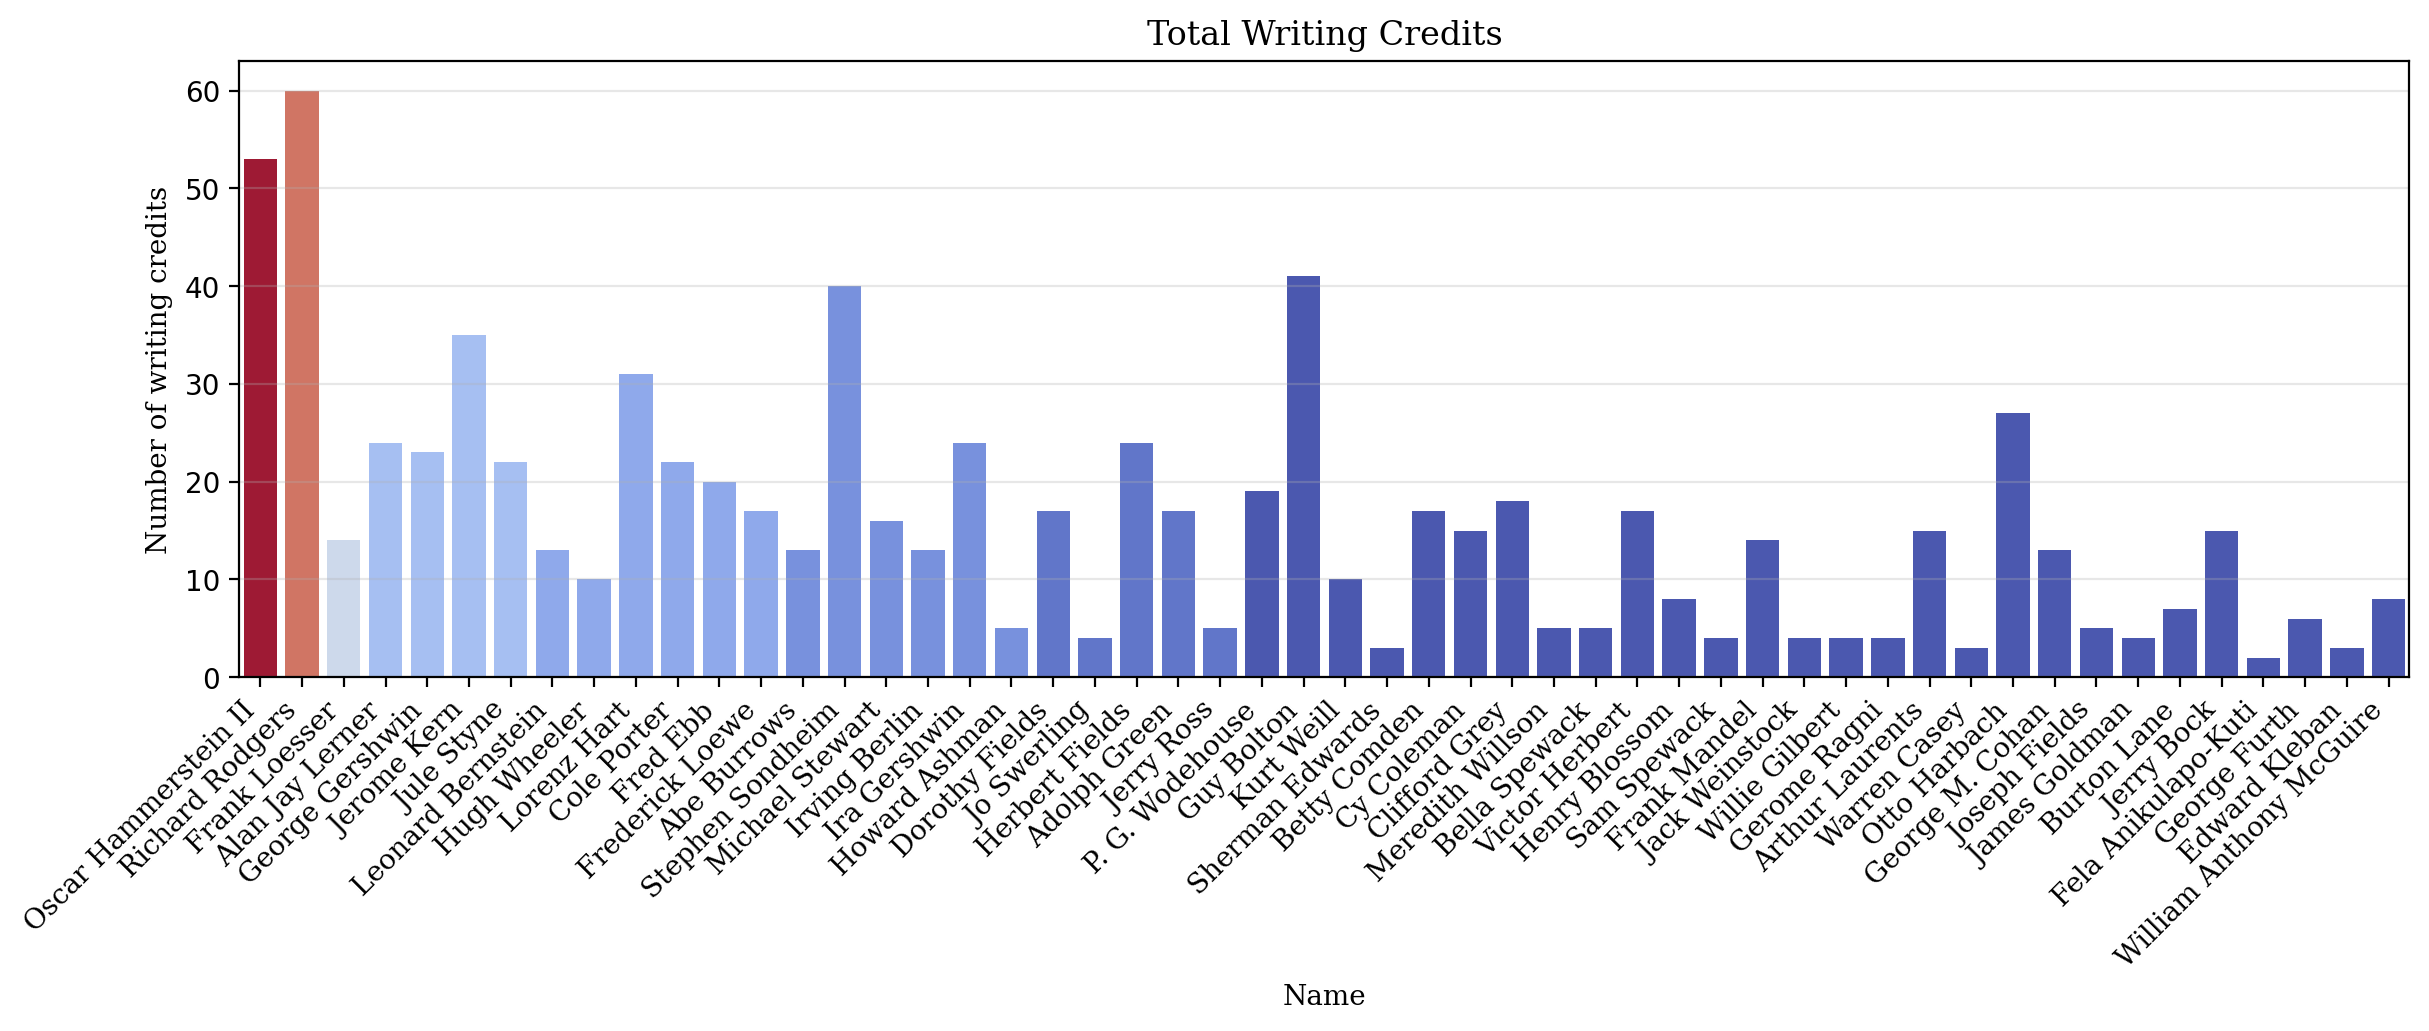

In [38]:

ph_st_writer_df = st_writer_df.loc[st_writer_df['year']>st_writer_df['death_year']]
fig, ax = plt.subplots(figsize=(14, 4))

counts = ph_st_writer_df['name'].value_counts()
valid_ids = counts[counts >= 2].index
filt_ph_st_writer_df = ph_st_writer_df[ph_st_writer_df['name'].isin(valid_ids)]

ph_counts1 = filt_ph_st_writer_df['name'].value_counts()
order = ph_counts1.index
values = ph_counts1.values
# Normalize counts for colormap
norm = plt.Normalize(values.min(), values.max())
colors = cm.coolwarm(norm(values))  # choose any matplotlib colormap

# Create color mapping
palette = dict(zip(order, colors))

sns.countplot(data=st_writer_df, x='name', ax=ax, order=order, palette=colors)
plt.grid(alpha=0.3, axis='y')
plt.xticks(rotation=45,ha='right', fontsize=10, fontfamily='serif')
plt.title('Total Writing Credits', fontfamily='serif', fontsize=12)
plt.ylabel('Number of writing credits', fontfamily="serif")
plt.xlabel('Name', fontfamily="serif")
#plt.figtext(0.5, -0.15, "Writers with one posthumous credit have been excluded", ha='center', fontsize=7, fontfamily="serif")
plt.show()

When were these posthumous writing credits?

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\740648931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_st_writer_df['years_ph'] = ph_st_writer_df['year']-ph_st_writer_df['death_year']


<Axes: title={'center': 'Timing of posthumous writing credits'}, xlabel='Years after death'>

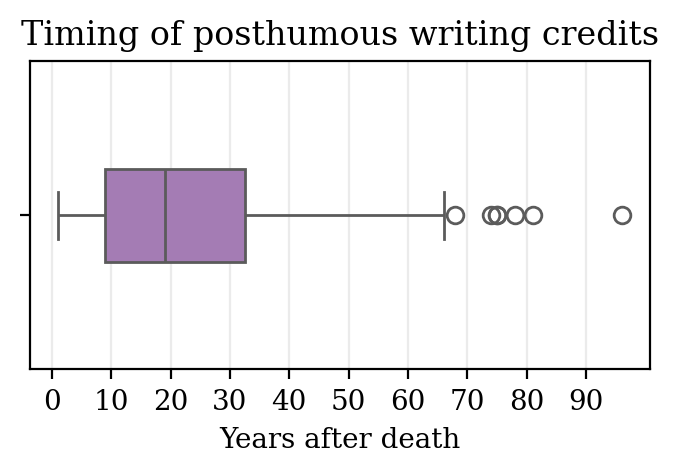

In [39]:
# Let's make a single boxplot that has the number of years after death that someone gets a posthumous writing credit
ph_st_writer_df['years_ph'] = ph_st_writer_df['year']-ph_st_writer_df['death_year']
fig, ax = plt.subplots(figsize=(4, 2))
plt.grid(axis='x', alpha=0.25)
plt.xticks(range(0, 100, 10), fontfamily='serif')
plt.title('Timing of posthumous writing credits', fontfamily='serif', fontsize=12)
plt.xlabel('Years after death', fontfamily="serif")
sns.boxplot(data=ph_st_writer_df, x='years_ph', width=0.3, color='#a873bd')


Let's look at each person's posthumous credit density

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\2839462043.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='name', y='ph_density', palette='viridis')


<Axes: title={'center': 'Density of Posthumous Writing Credits'}, xlabel='Name', ylabel='Posthumous credit density'>

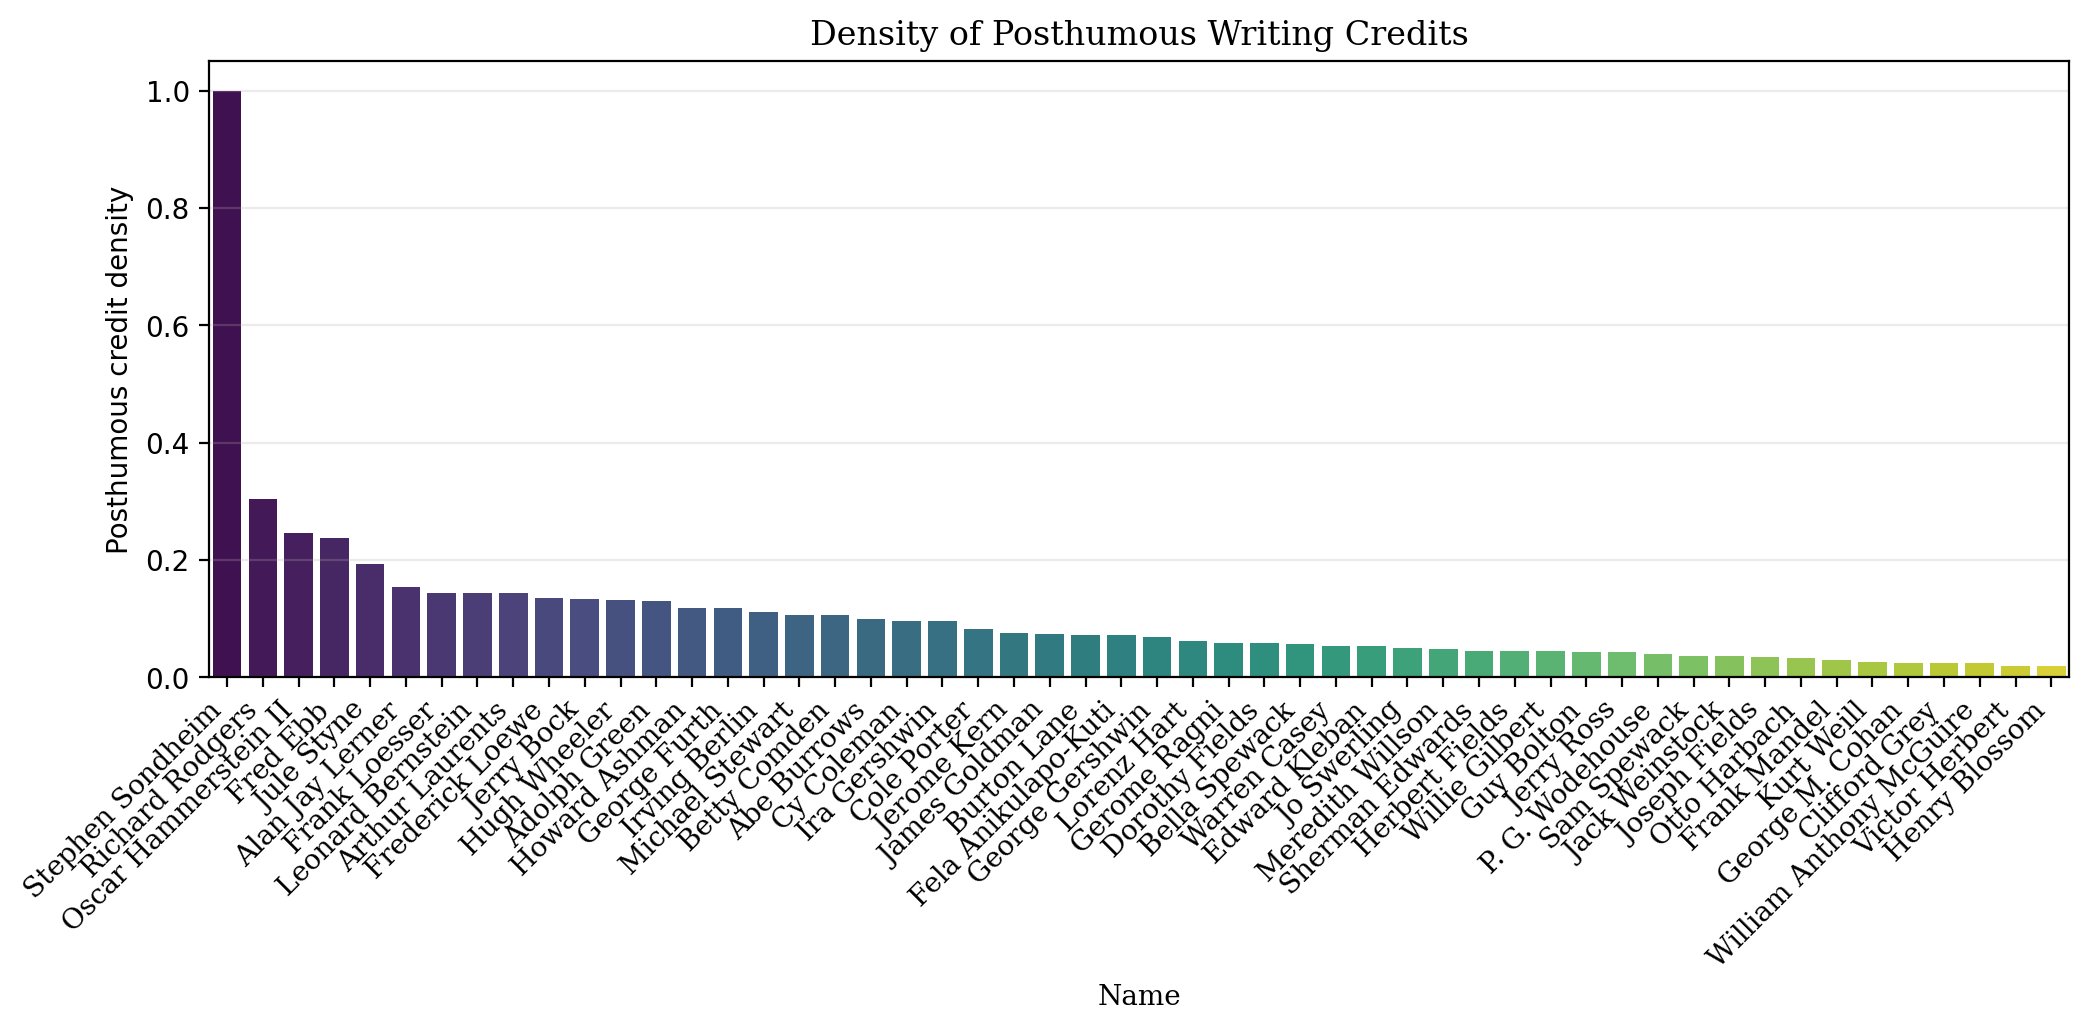

In [40]:
ph_counts2 = filt_ph_st_writer_df.groupby('person_id').size().reset_index(name='total_ph_creds')
death_years = filt_ph_st_writer_df[['person_id', 'name', 'death_year']].drop_duplicates()
summary_df = pd.merge(ph_counts2, death_years, on='person_id')
summary_df['ph_density'] = summary_df['total_ph_creds'] / (2025 - summary_df['death_year'])

summary_df = summary_df.sort_values(by='ph_density', ascending=False)
plt.figure(figsize=(12, 4))
plt.grid(axis='x', alpha=0.25)
plt.xticks(rotation=45,ha='right', fontsize=10, fontfamily='serif')
plt.title('Density of Posthumous Writing Credits', fontfamily='serif', fontsize=12)
plt.xlabel('Name', fontfamily="serif")
plt.ylabel('Posthumous credit density')
plt.grid(alpha=0.25)
sns.barplot(data=summary_df, x='name', y='ph_density', palette='viridis')

Let's try to look at their credit density over time to see if writers get more attention posthumously

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\657772029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_ph_st_writer_df['years_ph'] = filt_ph_st_writer_df['year']-filt_ph_st_writer_df['death_year']
C:\Users\12676\AppData\Local\Temp\ipykernel_24704\657772029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_ph_st_writer_df['cred_present'] = 1


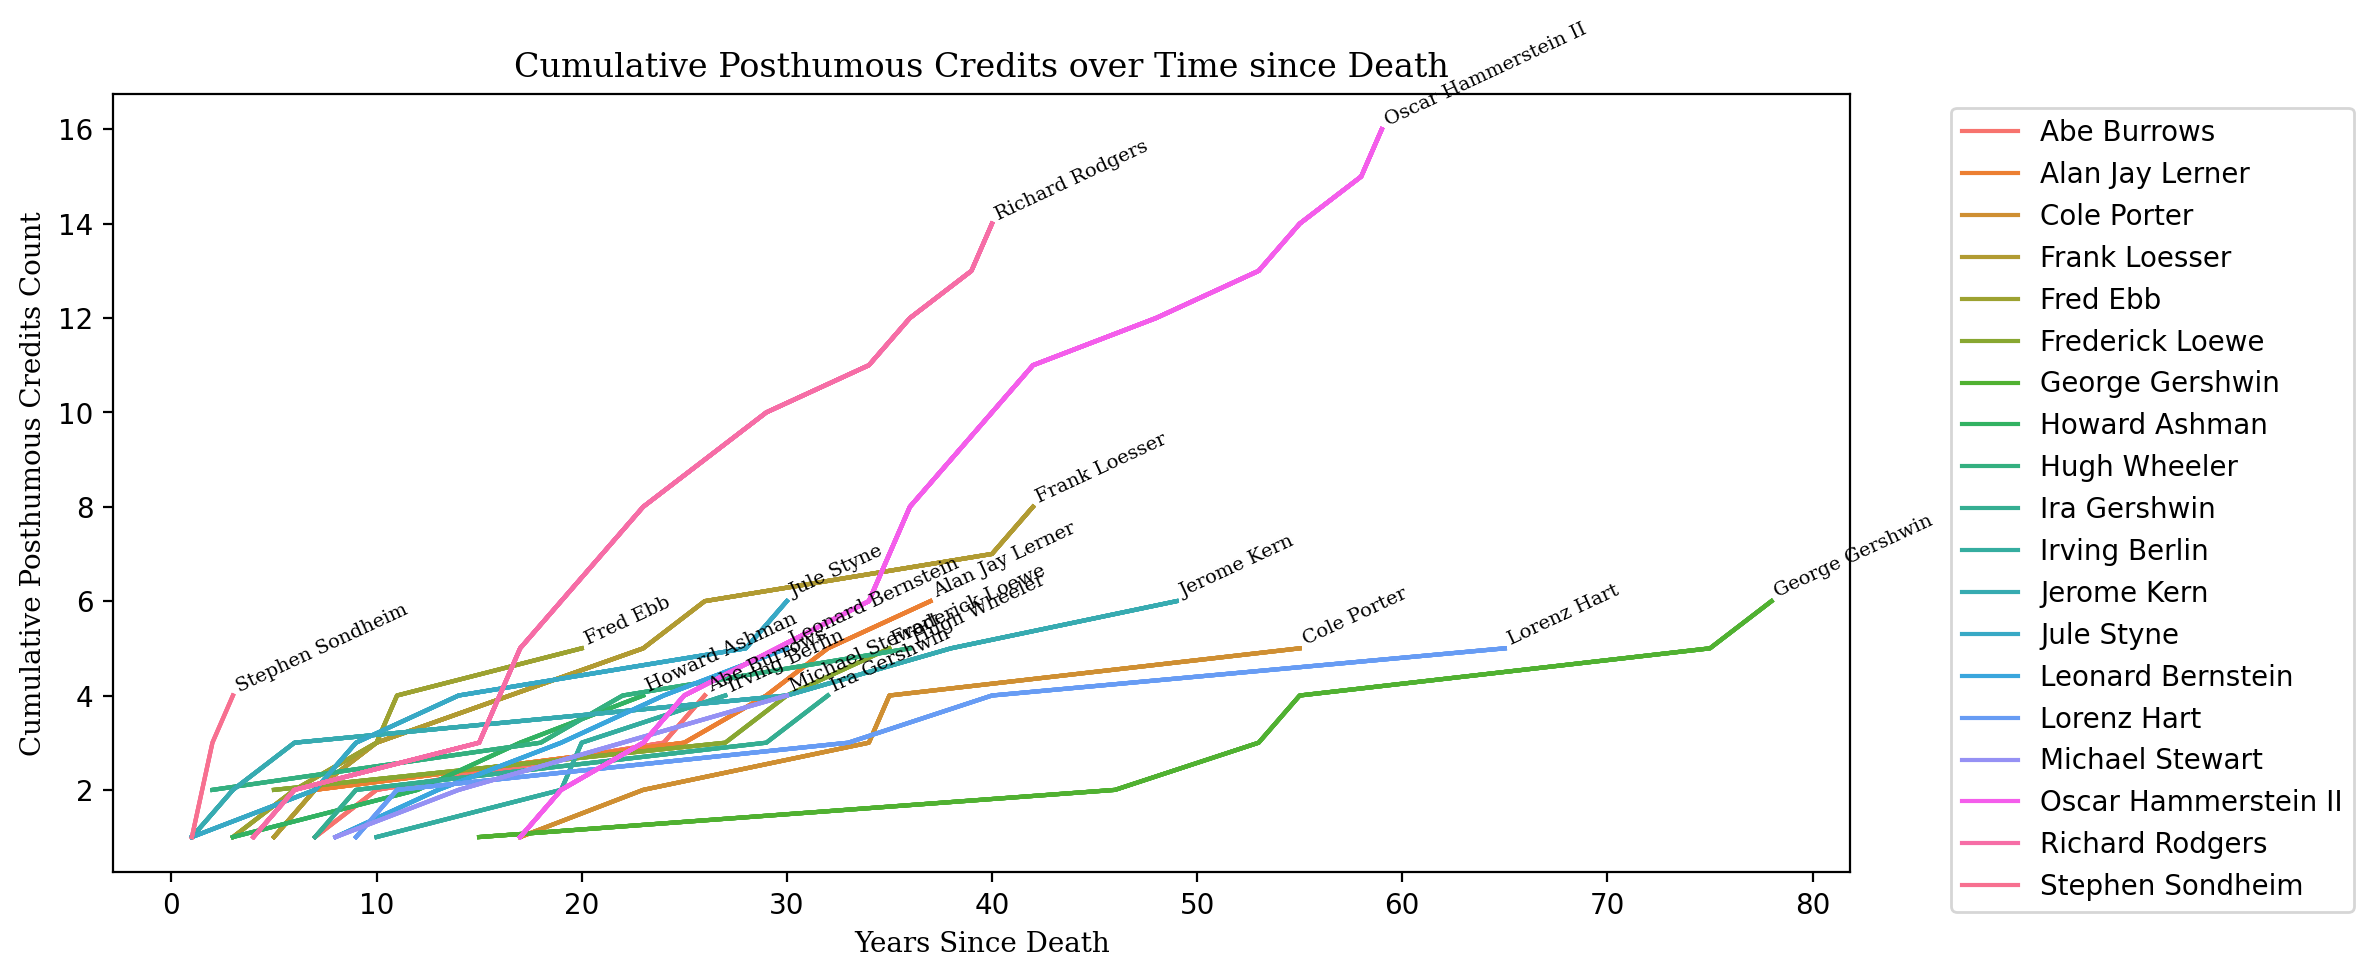

In [ ]:
# let's start by redefining the df we're working with.
st_writer_df = st_crew_df_strict_dist.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]

ph_st_writer_df = st_writer_df.loc[st_writer_df['year']>st_writer_df['death_year']]
counts = ph_st_writer_df['name'].value_counts()
valid_ids = counts[counts >= 2].index
filt_ph_st_writer_df = ph_st_writer_df[ph_st_writer_df['name'].isin(valid_ids)]
filt_ph_st_writer_df['years_ph'] = filt_ph_st_writer_df['year']-filt_ph_st_writer_df['death_year']
filt_ph_st_writer_df['cred_present'] = 1

event_df = filt_ph_st_writer_df.groupby(['name', 'years_ph'])['cred_present'].sum().reset_index()

event_df = event_df.sort_values(by='years_ph')

event_df['cum_creds'] = event_df.groupby('name')['cred_present'].cumsum()
counts = ph_st_writer_df['name'].value_counts()
valid_ids = counts[counts >= 4].index
filt_event_df = event_df[event_df['name'].isin(valid_ids)]
some_names = ['Stephen Sondheim', 'Richard Rodgers', 'Oscar Hammerstein II', 'Fred Ebb', 'Frank Loesser', 'Alan Jay Lerner', 'Leonard Bernstein']
filt_event_df2 = event_df[event_df['name'].isin(some_names)]

hue_order = filt_event_df.sort_values(by='name')['name']

# Plot cumulative sum
plt.figure(figsize=(12, 5))
sns.lineplot(data=filt_event_df, x='years_ph', y='cum_creds', hue='name', hue_order=hue_order)
for name in filt_event_df['name'].unique():
    # Get the final point for each author
    final_data = filt_event_df[filt_event_df['name'] == name].iloc[-1]
    # Place the author's name at the final point
    plt.text(final_data['years_ph'], final_data['cum_creds'], name,
             horizontalalignment='left', verticalalignment='bottom', fontsize=7, fontfamily='serif', rotation=25)

# Title and labels
plt.title("Cumulative Posthumous Credits over Time since Death", fontfamily='serif')
plt.xlabel("Years Since Death", fontfamily='serif')
plt.ylabel("Cumulative Posthumous Credits Count", fontfamily='serif')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()

Let's try to re-make this but include their prehumous credits. This means years_ph can be negative.

C:\Users\12676\AppData\Local\Temp\ipykernel_24704\3280090857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_ph_st_writer_df['years_ph'] = filt_ph_st_writer_df['year']-filt_ph_st_writer_df['death_year']
C:\Users\12676\AppData\Local\Temp\ipykernel_24704\3280090857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_ph_st_writer_df['cred_present'] = 1


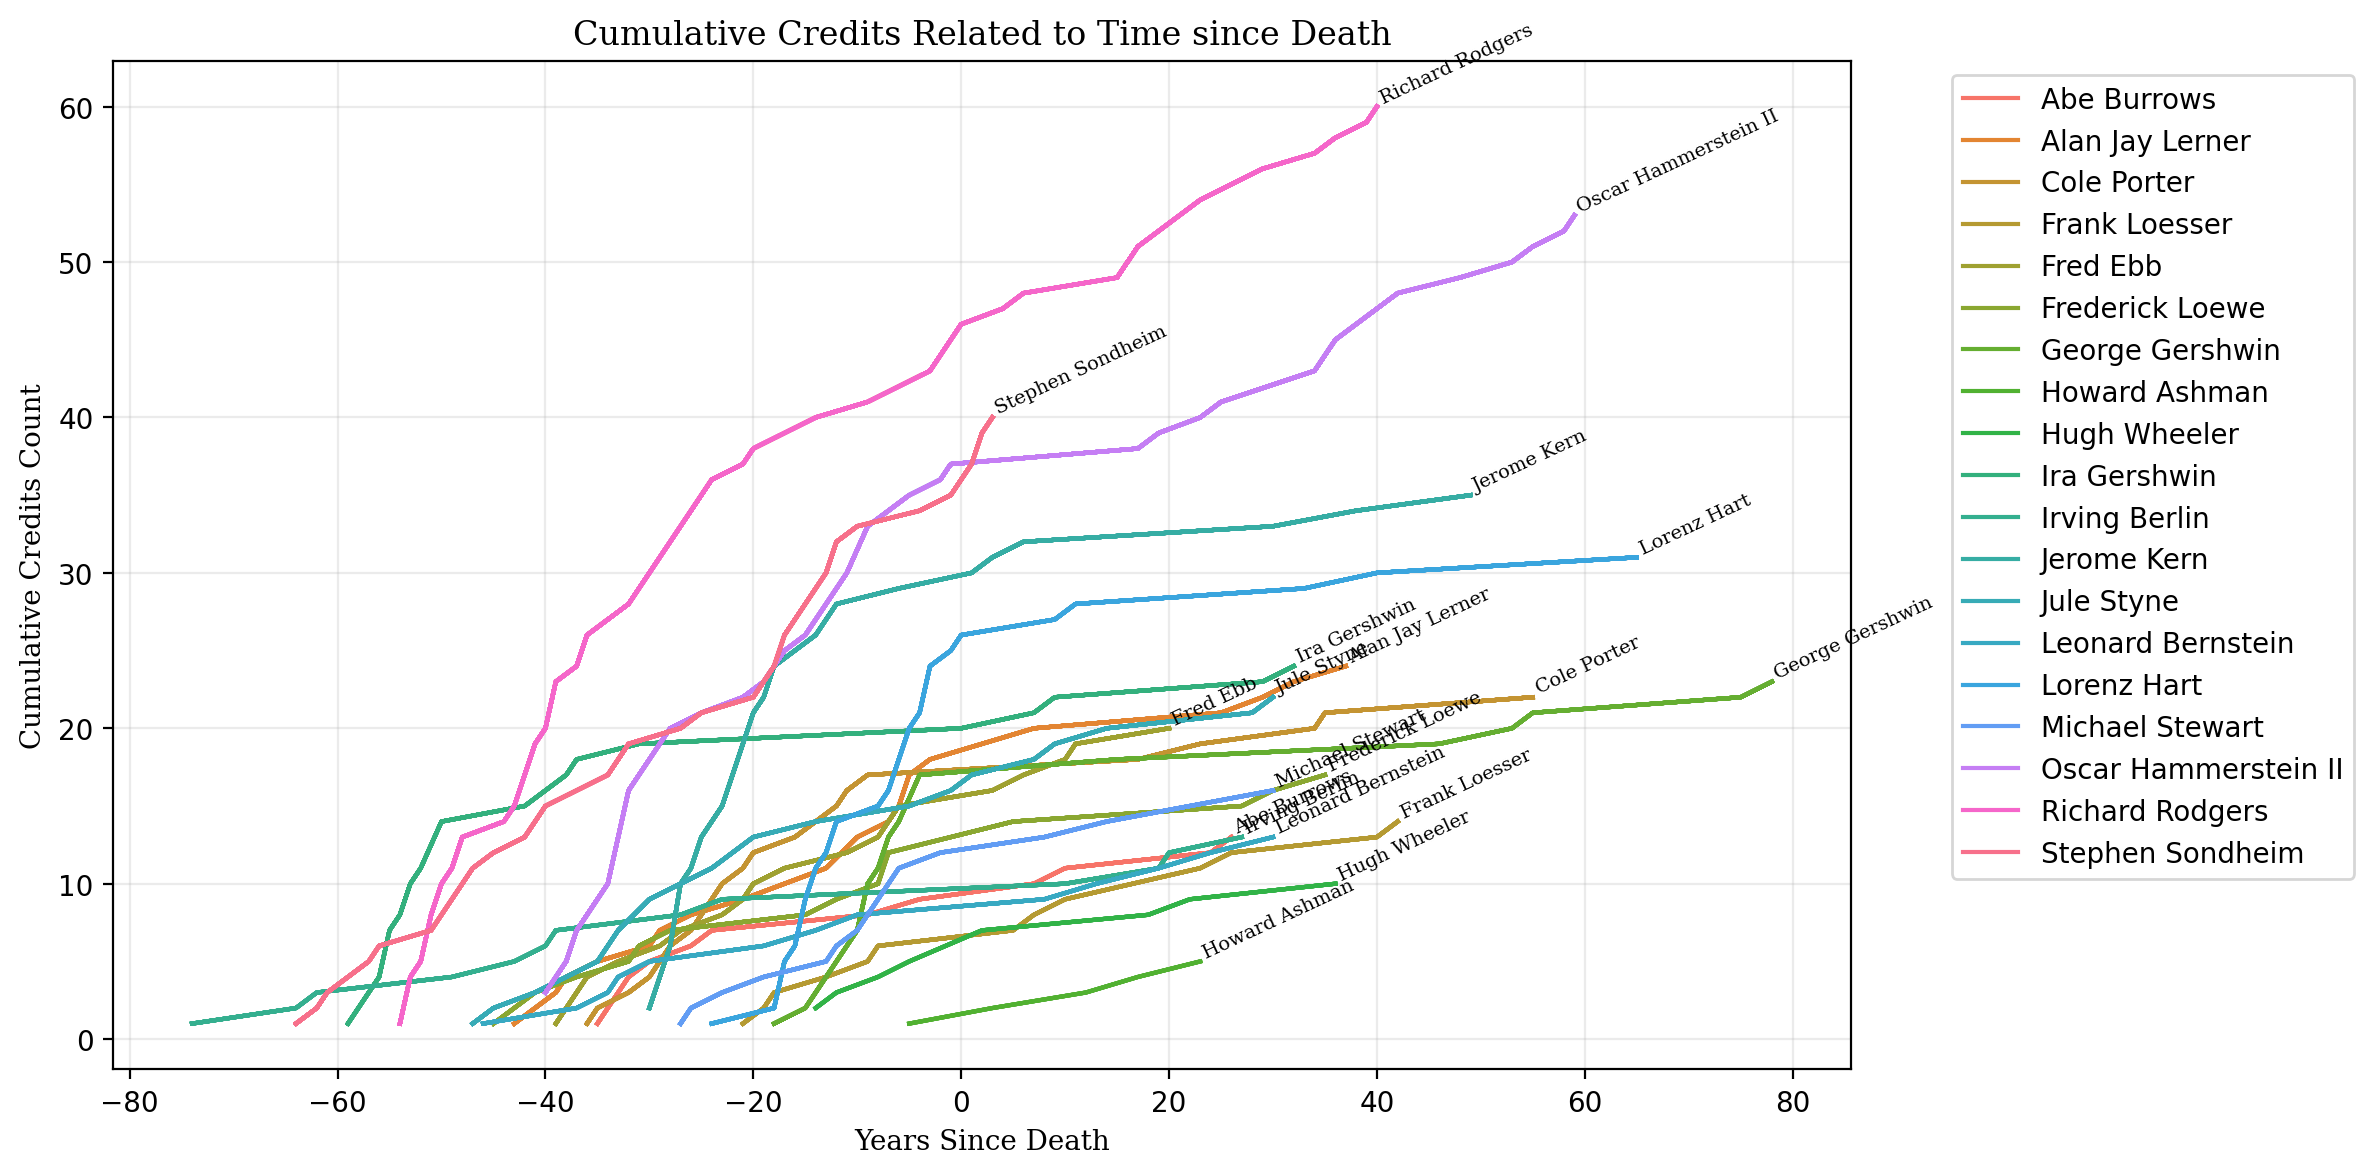

In [ ]:
st_writer_df = st_crew_df_strict_dist.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]

#ph_st_writer_df = st_writer_df.loc[st_writer_df['year']>st_writer_df['death_year']]
counts = st_writer_df['name'].value_counts()
valid_ids = counts[counts >= 2].index
filt_ph_st_writer_df = st_writer_df[st_writer_df['name'].isin(valid_ids)]
filt_ph_st_writer_df['years_ph'] = filt_ph_st_writer_df['year']-filt_ph_st_writer_df['death_year']
filt_ph_st_writer_df['cred_present'] = 1

event_df = filt_ph_st_writer_df.groupby(['name', 'years_ph'])['cred_present'].sum().reset_index()

event_df = event_df.sort_values(by='years_ph')

event_df['cum_creds'] = event_df.groupby('name')['cred_present'].cumsum()
counts = ph_st_writer_df['name'].value_counts()
valid_ids = counts[counts >= 4].index
filt_event_df = event_df[event_df['name'].isin(valid_ids)]
some_names = ['Stephen Sondheim', 'Richard Rodgers', 'Oscar Hammerstein II', 'Fred Ebb', 'Frank Loesser', 'Alan Jay Lerner', 'Leonard Bernstein']
filt_event_df2 = event_df[event_df['name'].isin(some_names)]

hue_order = filt_event_df.sort_values(by='name')['name']

plt.figure(figsize=(12, 6))
sns.lineplot(data=filt_event_df, x='years_ph', y='cum_creds', hue='name', hue_order=hue_order)
for name in filt_event_df['name'].unique():
    # Get the final point for each author
    final_data = filt_event_df[filt_event_df['name'] == name].iloc[-1]
    # Place the author's name at the final point
    plt.text(final_data['years_ph'], final_data['cum_creds'], name,
             horizontalalignment='left', verticalalignment='bottom', fontsize=7, fontfamily='serif', rotation=25)

# Title and labels
plt.title("Cumulative Credits Related to Time since Death", fontfamily='serif')
plt.xlabel("Years Since Death", fontfamily='serif')
plt.ylabel("Cumulative Credits Count", fontfamily='serif')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.25)
plt.tight_layout()

In [43]:
st_writer_df = st_crew_df_strict_dist.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]
st_writer_df['name'].mode()

0    Richard Rodgers
Name: name, dtype: object

In [44]:
ph_st_writer_df.loc[ph_st_writer_df['years_ph'].idxmax()]

KeyError: 'years_ph'

In [ ]:
ph_st_writer_df.loc[ph_st_writer_df['name']=='Stephen Sondheim']['title']

37388                    Gypsy
46398           Into the Woods
63202    Merrily We Roll Along
93863             Sweeney Todd
Name: title, dtype: object

Let's look at the overlap of different writing roles:

              role_combo  count                label
0                 (book)   1106                 book
1                (music)   1096                music
2         (book, lyrics)    606         book, lyrics
3               (lyrics)    587               lyrics
4        (music, lyrics)    420        lyrics, music
5  (music, book, lyrics)    169  book, lyrics, music
6          (music, book)     24          book, music
7              (writing)      2              writing


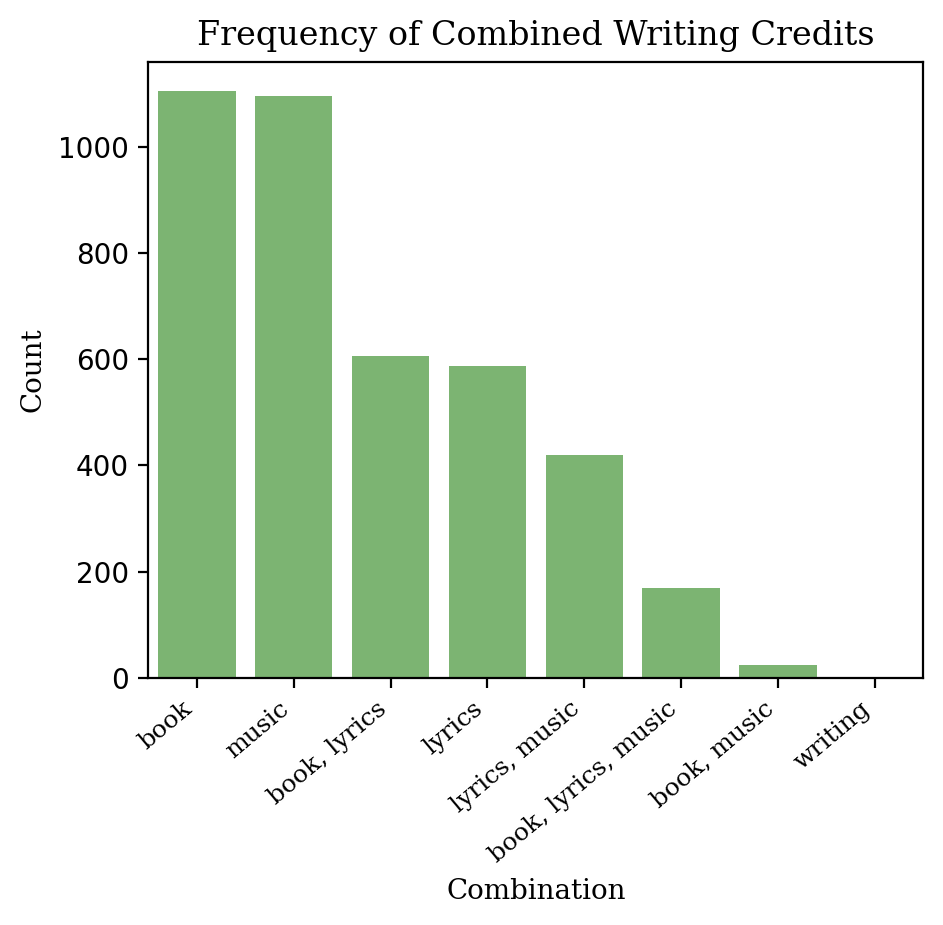

In [ ]:
st_writer_df = st_crew_df_strict.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]
st_writer_df = st_writer_df.drop_duplicates(subset=['person_id', 'property_id', 'role'], keep='first') # don't use revivals 
#st_writer_df.groupby(['work_id', 'person_id', 'role']).size().reset_index(name='count')

role_sets = st_writer_df.groupby(['person_id', 'work_id'])['role'].apply(lambda x: frozenset(x)).reset_index(name='role_combo')

# Count how often each role combination appears
combo_counts = role_sets['role_combo'].value_counts().reset_index()
combo_counts.columns = ['role_combo', 'count']
combo_counts['label'] = combo_counts['role_combo'].apply(lambda x: ', '.join(sorted(x)))

print(combo_counts)
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=combo_counts, x='label', y='count', ax=ax, color='#74bf67')
plt.xticks(fontsize=9, rotation=40,ha='right', fontfamily='serif')
plt.title("Frequency of Combined Writing Credits", fontfamily='serif')
plt.xlabel("Combination", fontfamily='serif')
plt.ylabel("Count", fontfamily='serif')
plt.show()

Let me look at this over time:

              role_combo  count                label
0                 (book)   1106                 book
1                (music)   1096                music
2         (book, lyrics)    606         book, lyrics
3               (lyrics)    587               lyrics
4        (music, lyrics)    420        lyrics, music
5  (music, book, lyrics)    169  book, lyrics, music
6          (music, book)     24          book, music
7              (writing)      2              writing


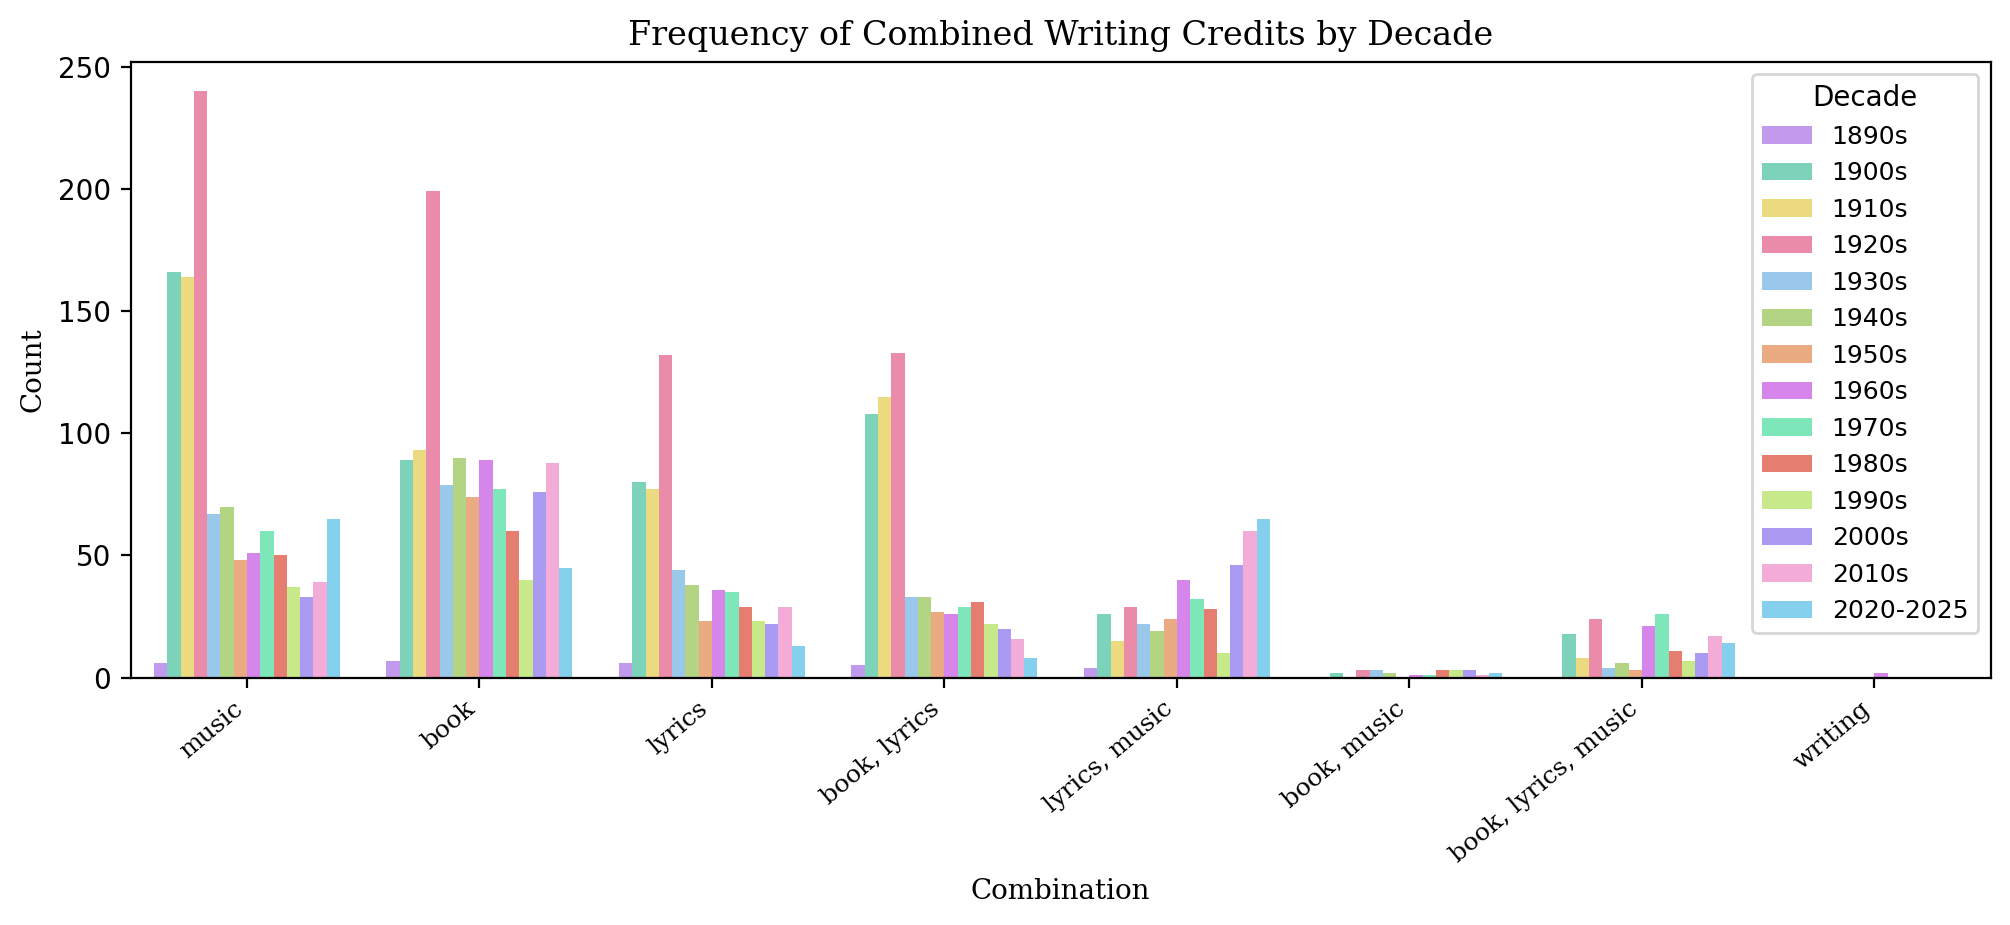

In [ ]:
st_writer_df = st_crew_df_strict.loc[st_crew_df['role'].isin(['book', 'music', 'lyrics', 'writing'])]
st_writer_df = st_writer_df.drop_duplicates(subset=['person_id', 'property_id', 'role'], keep='first') # don't use revivals 
#st_writer_df.groupby(['work_id', 'person_id', 'role']).size().reset_index(name='count')

bins4 = [1834, 1839, 1849, 1859, 1869, 1879, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels4 = ['1834-1839', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']

st_writer_df['year_bin'] = pd.cut(st_writer_df['year'], bins=bins4, labels=bin_labels4, include_lowest=True)
st_writer_df['year_bin']=st_writer_df['year_bin'].astype(str) 

role_sets = st_writer_df.groupby(['person_id', 'work_id', 'year_bin'])['role'].apply(lambda x: frozenset(x)).reset_index(name='role_combo')


# Count how often each role_combo appears per year
combo_counts_by_year = role_sets.groupby(['year_bin', 'role_combo']).size().reset_index(name='count')
# Make role_combo human-readable
combo_counts_by_year['label'] = combo_counts_by_year['role_combo'].apply(lambda x: ', '.join(sorted(x)))

# Count how often each role combination appears
# combo_counts = role_sets['year_bin','role_combo'].value_counts().reset_index()
# combo_counts.columns = ['role_combo', 'count']
# combo_counts['label'] = combo_counts['role_combo'].apply(lambda x: ', '.join(sorted(x)))

palette=['#c08cfb', '#6ee2be', '#fde66d', '#f97ba3', '#8dcaf7',
 '#b6e176', '#fca870', '#e075fb', '#6cf8bb', '#f86d5e',
 '#cdf97a', '#a18cff', '#ff9fda', '#72d8ff']

print(combo_counts)
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=combo_counts_by_year, x='label', y='count', hue='year_bin', ax=ax, palette=palette)
plt.xticks(fontsize=9, rotation=40,ha='right', fontfamily='serif')
plt.title("Frequency of Combined Writing Credits by Decade", fontfamily='serif')
plt.xlabel("Combination", fontfamily='serif')
plt.ylabel("Count", fontfamily='serif')
plt.legend(title='Decade', fontsize=9)
plt.show()

In [ ]:
role_sets

,person_id,work_id,role_combo
0,0000000636,07420011,(music)
1,0000001280,00370011,"(lyrics, book)"
2,0000001280,01740011,(book)
3,0000001280,02390012,"(lyrics, book)"
4,0000001280,02600011,"(lyrics, book)"
...,...,...,...
4005,0000050415,00040011,"(lyrics, music)"
4006,0000050419,05460011,(book)
4007,0000050420,09610011,(music)
4008,0000050421,15550011,(writing)
